<a href="https://colab.research.google.com/github/Gamaliel-Marines/Advanced-Artificial-Intelligence-II-Delivery/blob/main/Project_Stadistics_Gamaliel_Marines_A01708746.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto  Módulo 1
---
Gamaliel Marines | A01708746

# Connect to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Advanced AI/WorkShops"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Advanced AI/WorkShops


# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats.mstats import winsorize
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Read and Load the Datasets

In [ ]:
data = pd.read_csv("dataus2024.csv")
firms = pd.read_csv("Firms US 2024.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557181 entries, 0 to 557180
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   firm                557181 non-null  object 
 1   q                   557181 non-null  object 
 2   fiscalmonth         252818 non-null  float64
 3   revenue             252805 non-null  float64
 4   cogs                252805 non-null  float64
 5   sgae                220332 non-null  float64
 6   otherincome         252805 non-null  float64
 7   extraordinaryitems  220332 non-null  float64
 8   finexp              252805 non-null  float64
 9   incometax           252805 non-null  float64
 10  totalassets         252813 non-null  float64
 11  currentassets       245757 non-null  float64
 12  inventory           208304 non-null  float64
 13  totalliabilities    252809 non-null  float64
 14  currentliabilities  208308 non-null  float64
 15  longdebt            233868 non-nul

In [ ]:
data.head()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,year,fixedassets,yearf,cto,fiscalq
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,62.879221,104.0000,452000.000,2000,NaN,NaN,1,NaN
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,2186000.0,0.0,44.589833,73.7500,452271.967,2000,1453000.0,2000.0,2,2.0
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,2510000.0,0.0,29.587999,48.9375,453014.579,2000,1581000.0,2000.0,3,3.0
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,2758000.0,0.0,33.102282,54.7500,456366.381,2000,1741000.0,2000.0,4,4.0
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,3070000.0,0.0,18.579600,30.7300,456769.737,2001,1821000.0,2001.0,1,1.0


In [ ]:
firms1 = firms[["empresa","Nombre","status","naics1"]]
firms1.columns=['firm','Empresa','status','industria']

data = pd.merge(data,firms1,on="firm",how="left")

In [ ]:
data.head()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,originalprice,sharesoutstanding,year,fixedassets,yearf,cto,fiscalq,Empresa,status,industria
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104.0000,452000.000,2000,NaN,NaN,1,NaN,"Agilent Technologies, Inc",activo,Industrias manufactureras
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,73.7500,452271.967,2000,1453000.0,2000.0,2,2.0,"Agilent Technologies, Inc",activo,Industrias manufactureras
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,48.9375,453014.579,2000,1581000.0,2000.0,3,3.0,"Agilent Technologies, Inc",activo,Industrias manufactureras
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,54.7500,456366.381,2000,1741000.0,2000.0,4,4.0,"Agilent Technologies, Inc",activo,Industrias manufactureras
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,30.7300,456769.737,2001,1821000.0,2001.0,1,1.0,"Agilent Technologies, Inc",activo,Industrias manufactureras


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557181 entries, 0 to 557180
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   firm                557181 non-null  object 
 1   q                   557181 non-null  object 
 2   fiscalmonth         252818 non-null  float64
 3   revenue             252805 non-null  float64
 4   cogs                252805 non-null  float64
 5   sgae                220332 non-null  float64
 6   otherincome         252805 non-null  float64
 7   extraordinaryitems  220332 non-null  float64
 8   finexp              252805 non-null  float64
 9   incometax           252805 non-null  float64
 10  totalassets         252813 non-null  float64
 11  currentassets       245757 non-null  float64
 12  inventory           208304 non-null  float64
 13  totalliabilities    252809 non-null  float64
 14  currentliabilities  208308 non-null  float64
 15  longdebt            233868 non-nul

**CALCULATE THE VARIABLE COLUMN FOR NET INCOME AND OTHER ASSOCIATED VARIABLES:**

- *Gross Profit = Revenue - COGS*  
  - **COGS** = Cost of Goods Sold; these are VARIABLE expenses that change with sales.  
- *Operating Profit before Tax = EBIT (Earnings Before Interest and Taxes)*

- **EBIT** = GROSS PROFIT - SGAE (Selling, General, and Administrative Expenses)

- **NET INCOME** = EBIT - FINEXP (Interest payments on loans) - INCOMETAX (Income tax payments) + OTHERINCOME (Non-core revenue) + EXTRAORDINARYITEMS (Extraordinary sales)

In [ ]:
data['GROSSPROFIT'] = data['revenue'] - data['cogs']
data['EBIT'] = data['GROSSPROFIT'] - data['sgae']
data['NETINCOME'] = data['EBIT'] - data['finexp'] - data['incometax'] + data['otherincome'] + data['extraordinaryitems']
data['EBT'] = data['EBIT'] - data['finexp'] + data['otherincome'] + data['extraordinaryitems']

# CALCULATE MARKET VALUE AND BOOK VALUE

**Market Value = MARKET VALUE = originalprice * sharesoutstanding**  
- **originalprice** = original price of the stock  
- **sharesoutstanding** = number of shares available  

**Book Value = BOOK VALUE = totalassets - totalliabilities**  
- **totalassets** = total assets (resources)  
- **totalliabilities** = total liabilities  

In [ ]:
data['BOOKVALUE'] = data['totalassets'] - data['totalliabilities']
data['MARKETVALUE'] = data['originalprice'] * data['sharesoutstanding']

AHORA CALCULAMOS LOS RETORNOS DE ACCIÓN PARA TODAS LAS EMPRESAS (TRIMESTRALES Y ANUALES)

**RETORNOS SIMPLES**
- retorno trimestral = QR = (adjprice / adjprice{t-1} - 1
- retorno anual = YR = adjprice / adjprice {t-4} - 1

**RETORNOS CONTINUOS COMPUESTOS**

- ret trimestral = qr = log(adjprice) - log(adjprice{t-1}) = log (adjprice / adjprice{t-1})
- ret anual = yr = log(adjprice) - log (adjprice{t-4})




GENERO UN ÍNDICE EN EL DATASET POR FIRM-QUARTER:

In [ ]:
data['qdate'] = pd.PeriodIndex(data.q, freq='Q')
data.set_index(['firm','qdate'], inplace = True)
data.head()
data.index

MultiIndex([(     'A', '2000Q1'),
            (     'A', '2000Q2'),
            (     'A', '2000Q3'),
            (     'A', '2000Q4'),
            (     'A', '2001Q1'),
            (     'A', '2001Q2'),
            (     'A', '2001Q3'),
            (     'A', '2001Q4'),
            (     'A', '2002Q1'),
            (     'A', '2002Q2'),
            ...
            ('ZY_old', '2022Q1'),
            ('ZY_old', '2022Q2'),
            ('ZY_old', '2022Q3'),
            ('ZY_old', '2022Q4'),
            ('ZY_old', '2023Q1'),
            ('ZY_old', '2023Q2'),
            ('ZY_old', '2023Q3'),
            ('ZY_old', '2023Q4'),
            ('ZY_old', '2024Q1'),
            ('ZY_old', '2024Q2')],
           names=['firm', 'qdate'], length=557181)

# Returns
---

In [ ]:
data['cc_return_q'] = np.log(data['adjprice']) - np.log(data['adjprice'].shift(1))
print("Actual")

print(data['cc_return_q'])
data['cc_return_y'] = np.log(data['adjprice']) - np.log(data['adjprice'].shift(4))
print("Futuro")
print(data['cc_return_y'])

Actual
firm    qdate 
A       2000Q1         NaN
        2000Q2   -0.343710
        2000Q3   -0.410137
        2000Q4    0.112233
        2001Q1   -0.577538
                    ...   
ZY_old  2023Q2         NaN
        2023Q3         NaN
        2023Q4         NaN
        2024Q1         NaN
        2024Q2         NaN
Name: cc_return_q, Length: 557181, dtype: float64
Futuro
firm    qdate 
A       2000Q1         NaN
        2000Q2         NaN
        2000Q3         NaN
        2000Q4         NaN
        2001Q1   -1.219152
                    ...   
ZY_old  2023Q2         NaN
        2023Q3         NaN
        2023Q4         NaN
        2024Q1         NaN
        2024Q2         NaN
Name: cc_return_y, Length: 557181, dtype: float64


*Future annual stock cc return (one-quarter ahead)*

*Contemporary continuous compounded returns (cc returns) for each firm-quarter.*

# Group by FIRM

In [ ]:
data['cc_return_q_future'] = data.groupby('firm')['cc_return_q'].shift(-1)
print(data['cc_return_q_future'])
data['cc_return_y_future'] = data.groupby('firm')['cc_return_q'].shift(-4)
print(data['cc_return_y_future'])

data['cc_return_y_future'] = data.groupby('firm')['cc_return_y'].shift(-1)
print(data['cc_return_y_future'])
data['cc_return_y_future'] = data.groupby('firm')['cc_return_y'].shift(-4)
print(data['cc_return_y_future'])


firm    qdate 
A       2000Q1   -0.343710
        2000Q2   -0.410137
        2000Q3    0.112233
        2000Q4   -0.577538
        2001Q1    0.056001
                    ...   
ZY_old  2023Q2         NaN
        2023Q3         NaN
        2023Q4         NaN
        2024Q1         NaN
        2024Q2         NaN
Name: cc_return_q_future, Length: 557181, dtype: float64
firm    qdate 
A       2000Q1   -0.577538
        2000Q2    0.056001
        2000Q3   -0.508265
        2000Q4    0.377280
        2001Q1    0.203950
                    ...   
ZY_old  2023Q2         NaN
        2023Q3         NaN
        2023Q4         NaN
        2024Q1         NaN
        2024Q2         NaN
Name: cc_return_y_future, Length: 557181, dtype: float64
firm    qdate 
A       2000Q1         NaN
        2000Q2         NaN
        2000Q3         NaN
        2000Q4   -1.219152
        2001Q1   -0.819441
                    ...   
ZY_old  2023Q2         NaN
        2023Q3         NaN
        2023Q4         NaN
    

# FINANCIAL RATIOS

## ROE (RETURN ON ASSETS)
---

- **ROE = NETINCOME/BOOKVALUE**


In [ ]:
data['ROE'] = data['NETINCOME'] / data['BOOKVALUE']
print(data['ROE'])

firm    qdate 
A       2000Q1         NaN
        2000Q2    0.063981
        2000Q3    0.092207
        2000Q4    0.143780
        2001Q1    0.027793
                    ...   
ZY_old  2023Q2         NaN
        2023Q3         NaN
        2023Q4         NaN
        2024Q1         NaN
        2024Q2         NaN
Name: ROE, Length: 557181, dtype: float64


## CURRENT RATIO

---

- **CURRENT RATIO = CURRENT ASSESTS / CURRENT LIABILITIES**

In [ ]:
data['CURRENTRATIO'] = data['currentassets'] / data['currentliabilities']
print(data['CURRENTRATIO'])

firm    qdate 
A       2000Q1         NaN
        2000Q2    2.313358
        2000Q3    2.129084
        2000Q4    2.050399
        2001Q1    1.778827
                    ...   
ZY_old  2023Q2         NaN
        2023Q3         NaN
        2023Q4         NaN
        2024Q1         NaN
        2024Q2         NaN
Name: CURRENTRATIO, Length: 557181, dtype: float64


## DEBT TO EQUITY

---

- **DEB-TOEQUITY = TOTAL LIABILITIES / EQUITY**

In [ ]:
data['DEBTTOEQUITY'] = data['totalliabilities'] / data['BOOKVALUE']
print(data['DEBTTOEQUITY'])

firm    qdate 
A       2000Q1         NaN
        2000Q2    0.577122
        2000Q3    0.596695
        2000Q4    0.600190
        2001Q1    0.661794
                    ...   
ZY_old  2023Q2         NaN
        2023Q3         NaN
        2023Q4         NaN
        2024Q1         NaN
        2024Q2         NaN
Name: DEBTTOEQUITY, Length: 557181, dtype: float64


## GROSS MARGIN
---

- **GROSSMARGIN = GROSS PROFIT / REVENUE**

In [ ]:
data['GROSSMARGIN'] = data['GROSSPROFIT'] / data['revenue']
print(data['GROSSMARGIN'])

firm    qdate 
A       2000Q1         NaN
        2000Q2    0.488269
        2000Q3    0.487907
        2000Q4    0.487422
        2001Q1    0.489968
                    ...   
ZY_old  2023Q2         NaN
        2023Q3         NaN
        2023Q4         NaN
        2024Q1         NaN
        2024Q2         NaN
Name: GROSSMARGIN, Length: 557181, dtype: float64


# Control Variables

In [ ]:
data['EPS'] = data['NETINCOME'] / data['sharesoutstanding']
data['EPSP'] = data['EPS'] / data['originalprice']
data['BOOKTOMARKETR'] = data['BOOKVALUE'] / data['MARKETVALUE']

# 1.2 Firm Composition of the US financial market

EMPRESAS ACTIVAS QUE EXISTAN EN EL DATASET

In [ ]:
empresasactivas = data[data['status'] == 'activo'].groupby('industria')['Empresa'].nunique()
print(empresasactivas)

industria
-                                                                                                   2
Agricultura, ganadería, aprovechamiento forestal, pesca y caza                                     17
Comercio al por mayor                                                                              74
Comercio al por menor                                                                             141
Construcción                                                                                       47
Empresas de electricidad, gas y agua                                                               78
Industrias manufactureras                                                                        1499
Información en medios masivos                                                                     243
Minería, explotación de canteras y extracción de petróleo y gas                                   109
Otros servicios excepto actividades gubernamentales                     

In [ ]:
sum(empresasactivas)

3444

Show a table that shows statistics about the book value and market value by industry. What can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed? You have to do the right descriptive statistics

In [ ]:

industry_stats = data.groupby('industria')[['BOOKVALUE', 'MARKETVALUE']].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

print(industry_stats)


                                                       BOOKVALUE               \
                                                            mean       median   
industria                                                                       
-                                                   4.400692e+06  5709856.000   
Agricultura, ganadería, aprovechamiento foresta...  1.993336e+06   723518.000   
Comercio al por mayor                               1.229648e+06   645100.000   
Comercio al por menor                               2.601954e+06   616000.000   
Construcción                                        1.590709e+06   808110.000   
Corporativos                                        8.906397e+03     5000.001   
Empresas de electricidad, gas y agua                4.764161e+06  2367010.000   
Industrias manufactureras                           2.427419e+06   350874.000   
Información en medios masivos                       3.808701e+06   440711.000   
Minería, explotación de cant

**What can you say about the typical firm size in terms of market value and book value?**

The median book value provides a reliable measure of the typical size of companies within each industry. However, the market value reveals significant variation in company size across different industries. Market value can substantially increase the perceived size of industries, with manufacturing companies generally dominating the market due to their large market sizes.

**How much do these variables change within each industry?**

The standard deviation shows the extent to which company sizes, in terms of both book value and market value, differ within each industry. This indicates that there are some very large companies and others that are much smaller in comparison.

**How is firm size (in market value) distributed?**

The distribution of firm sizes based on market value is quite varied. For instance, in the manufacturing and business support services sectors, the size distribution is highly uneven. The manufacturing sector includes major companies like Apple, Amazon, IBM, and NVIDIA, whereas business support services lack such high-market-value firms. This results in an uneven distribution influenced by the presence of a few large conglomerates alongside many smaller firms.

Which are the biggest 10 US firms in terms of market value and how far they are from the typical market size of a US firm?

In [ ]:
last_q = data[data['fiscalmonth'].isin([10, 11, 12])]

meanbookvalue = last_q['BOOKVALUE'].mean()
meanmarketvalue = last_q['MARKETVALUE'].mean()

topfirmsbookvalue = last_q.groupby('Empresa')[['BOOKVALUE']].mean().nlargest(10, 'BOOKVALUE')
topfirmsmarketvalue = last_q.groupby('Empresa')[['MARKETVALUE']].mean().nlargest(10, 'MARKETVALUE')

# Calculate the difference from the market average
topfirmsbookvalue['Difference from Market Average (BOOKVALUE)'] = topfirmsbookvalue['BOOKVALUE'] - meanbookvalue
topfirmsmarketvalue['Difference from Market Average (MARKETVALUE)'] = topfirmsmarketvalue['MARKETVALUE'] - meanmarketvalue

print("\nTop 10 Companies with the Highest Average BOOKVALUE in the Last Three Fiscal Months:")
print(topfirmsbookvalue)

print("\nTop 10 Companies with the Highest Average MARKETVALUE in the Last Three Fiscal Months:")
print(topfirmsmarketvalue)



Top 10 Companies with the Highest Average BOOKVALUE in the Last Three Fiscal Months:
                             BOOKVALUE  \
Empresa                                  
Berkshire Hathaway Inc    2.301427e+08   
Bank Of America Corp      1.952423e+08   
Jpmorgan Chase & Co       1.846668e+08   
Citigroup Inc             1.616072e+08   
Exxon Mobil Corp          1.484056e+08   
Wells Fargo & Company     1.255058e+08   
Alphabet Inc              1.144436e+08   
Chevron Corp              1.072952e+08   
AT&T Inc                  1.050246e+08   
General Electric Company  8.875175e+07   

                          Difference from Market Average (BOOKVALUE)  
Empresa                                                               
Berkshire Hathaway Inc                                  2.271061e+08  
Bank Of America Corp                                    1.922058e+08  
Jpmorgan Chase & Co                                     1.816303e+08  
Citigroup Inc                                         

In [ ]:
meanbookvalue = data['BOOKVALUE'].mean()
meanmarketvalue = data['MARKETVALUE'].mean()

In [ ]:
topfirmsbookvalue = data.groupby('Empresa')[['BOOKVALUE']].mean().nlargest(10, 'BOOKVALUE')
topfirmsmarketvalue = data.groupby('Empresa')[['MARKETVALUE']].mean().nlargest(10,'MARKETVALUE')

In [ ]:
topfirmsbookvalue['Diferencia Promedio de Mercado (BOOKVALUE)'] = topfirmsbookvalue['BOOKVALUE'] - meanbookvalue
topfirmsmarketvalue['Diferencia Promedio de Mercado (MARKETVALUE)'] = topfirmsmarketvalue['MARKETVALUE'] - meanmarketvalue


In [ ]:
print("\nTop 10 Companies with the Highest Average BOOKVALUE:")
print(topfirmsbookvalue)


Top 10 Companies with the Highest Average BOOKVALUE:
                             BOOKVALUE  \
Empresa                                  
Berkshire Hathaway Inc    2.234475e+08   
Bank Of America Corp      1.956184e+08   
Jpmorgan Chase & Co       1.823613e+08   
Citigroup Inc             1.611989e+08   
Exxon Mobil Corp          1.461258e+08   
Wells Fargo & Company     1.237882e+08   
Alphabet Inc              1.134736e+08   
Chevron Corp              1.058642e+08   
AT&T Inc                  1.031803e+08   
General Electric Company  8.762853e+07   

                          Diferencia Promedio de Mercado (BOOKVALUE)  
Empresa                                                               
Berkshire Hathaway Inc                                  2.204106e+08  
Bank Of America Corp                                    1.925815e+08  
Jpmorgan Chase & Co                                     1.793244e+08  
Citigroup Inc                                           1.581620e+08  
Exxon Mobil Cor

In [ ]:
print("\nTop 10 Companies with the Highest Average MARKETVALUE:")
print(topfirmsmarketvalue)


Top 10 Companies with the Highest Average MARKETVALUE:
                           MARKETVALUE  \
Empresa                                  
Apple Inc                 7.114284e+08   
Microsoft Corp            6.949694e+08   
Alphabet Inc              5.923001e+08   
Meta Platforms, Inc       4.713809e+08   
Amazon.Com, Inc           4.093128e+08   
Exxon Mobil Corp          3.450452e+08   
Walmart Inc               2.598115e+08   
Johnson & Johnson         2.555702e+08   
General Electric Company  2.413596e+08   
Tesla, Inc                2.294606e+08   

                          Diferencia Promedio de Mercado (MARKETVALUE)  
Empresa                                                                 
Apple Inc                                                 7.025992e+08  
Microsoft Corp                                            6.861402e+08  
Alphabet Inc                                              5.834709e+08  
Meta Platforms, Inc                                       4.625517e+08  
A

In [ ]:
print("\nDifference in Average BOOKVALUE Compared to Market Average:")
print(topfirmsbookvalue[['BOOKVALUE', 'Diferencia Promedio de Mercado (BOOKVALUE)']])


Difference in Average BOOKVALUE Compared to Market Average:
                             BOOKVALUE  \
Empresa                                  
Berkshire Hathaway Inc    2.234475e+08   
Bank Of America Corp      1.956184e+08   
Jpmorgan Chase & Co       1.823613e+08   
Citigroup Inc             1.611989e+08   
Exxon Mobil Corp          1.461258e+08   
Wells Fargo & Company     1.237882e+08   
Alphabet Inc              1.134736e+08   
Chevron Corp              1.058642e+08   
AT&T Inc                  1.031803e+08   
General Electric Company  8.762853e+07   

                          Diferencia Promedio de Mercado (BOOKVALUE)  
Empresa                                                               
Berkshire Hathaway Inc                                  2.204106e+08  
Bank Of America Corp                                    1.925815e+08  
Jpmorgan Chase & Co                                     1.793244e+08  
Citigroup Inc                                           1.581620e+08  
Exxon Mo

In [ ]:
print("\nDifference in Average MARKETVALUE Compared to Market Average:")
print(topfirmsmarketvalue[['MARKETVALUE', 'Diferencia Promedio de Mercado (MARKETVALUE)']])


Difference in Average MARKETVALUE Compared to Market Average:
                           MARKETVALUE  \
Empresa                                  
Apple Inc                 7.114284e+08   
Microsoft Corp            6.949694e+08   
Alphabet Inc              5.923001e+08   
Meta Platforms, Inc       4.713809e+08   
Amazon.Com, Inc           4.093128e+08   
Exxon Mobil Corp          3.450452e+08   
Walmart Inc               2.598115e+08   
Johnson & Johnson         2.555702e+08   
General Electric Company  2.413596e+08   
Tesla, Inc                2.294606e+08   

                          Diferencia Promedio de Mercado (MARKETVALUE)  
Empresa                                                                 
Apple Inc                                                 7.025992e+08  
Microsoft Corp                                            6.861402e+08  
Alphabet Inc                                              5.834709e+08  
Meta Platforms, Inc                                       4.625517e

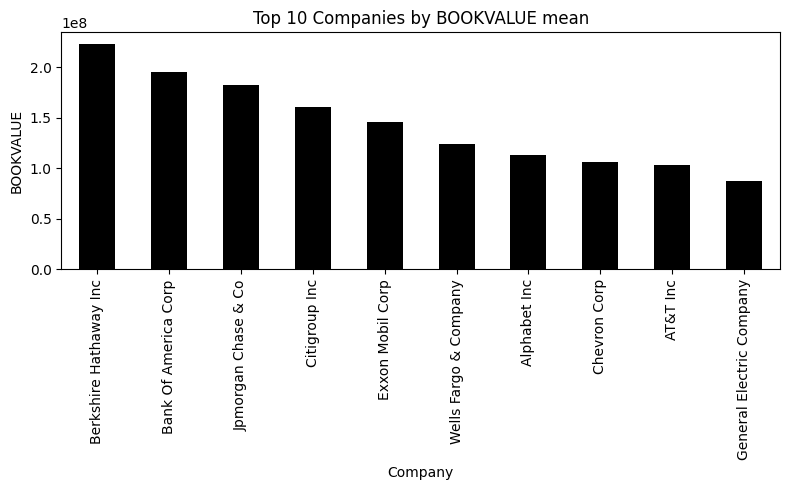

In [ ]:
plt.figure(figsize=(8, 5))
topfirmsbookvalue['BOOKVALUE'].plot(kind='bar', color='black')
plt.title('Top 10 Companies by BOOKVALUE mean')
plt.ylabel('BOOKVALUE')
plt.xlabel('Company')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

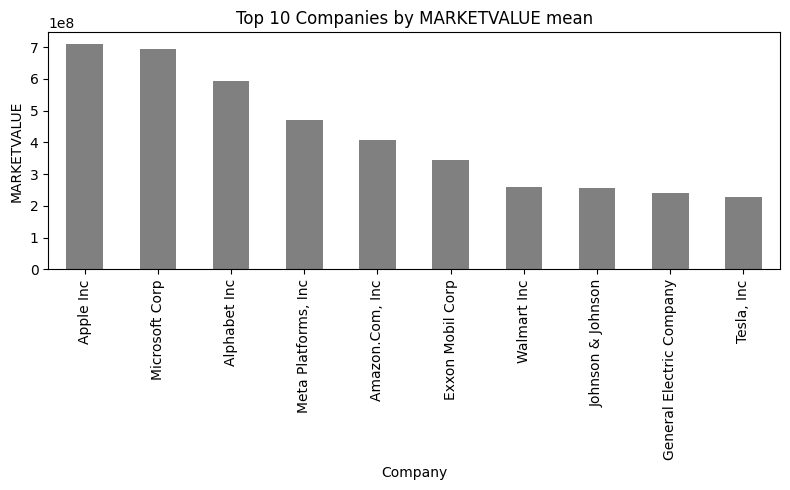

In [ ]:
plt.figure(figsize=(8, 5))
topfirmsmarketvalue['MARKETVALUE'].plot(kind='bar', color='grey')
plt.title('Top 10 Companies by MARKETVALUE mean')
plt.ylabel('MARKETVALUE')
plt.xlabel('Company')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 1.3 Evolution of the US financial market

In [ ]:
# Filtrar datos por mes fiscal 12
data_annual = data[data['fiscalmonth'] == 12]

# Agrupar por año y calcular el valor total de mercado
market_value_by_year = data_annual.groupby('year')['MARKETVALUE'].sum()

# Convertir Series a DataFrame
market_value_by_year_df = market_value_by_year.reset_index()
market_value_by_year_df.columns = ['Year', 'Total Market Value']

# Imprimir resultados
print("Evolution of the Total Value of the U.S. Financial Market by Fiscal Year:")
market_value_by_year_df


Evolution of the Total Value of the U.S. Financial Market by Fiscal Year:


,Year,Total Market Value
0,2000,1.271442e+10
1,2001,1.138682e+10
2,2002,9.382138e+09
3,2003,1.155087e+10
4,2004,1.310071e+10
5,2005,1.365024e+10
6,2006,1.529529e+10
7,2007,1.593777e+10
8,2008,1.024751e+10
9,2009,1.163598e+10


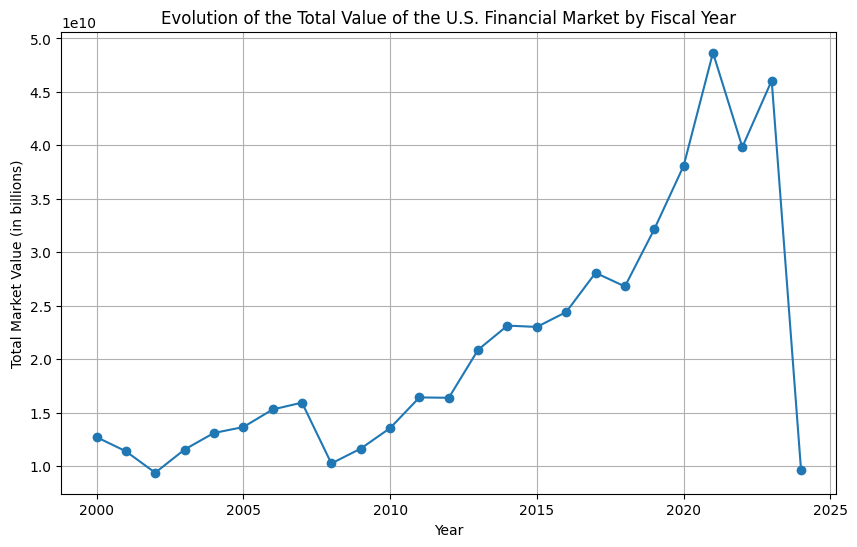

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(market_value_by_year_df['Year'], market_value_by_year_df['Total Market Value'], marker='o')
plt.title("Evolution of the Total Value of the U.S. Financial Market by Fiscal Year")
plt.xlabel("Year")
plt.ylabel("Total Market Value (in billions)")
plt.grid(True)
plt.show()

- **How the total market value of the US market has changed over the years? Do a table and/or graph and explain**

The graph illustrates the fluctuations in the total market value of the U.S. market from 2000 to 2024, highlighting key economic events and their impact on market value.

From 2000 to 2002, there is a noticeable decline due to the burst of the dot-com bubble, which led to the collapse of numerous companies, steep drops in stock prices, and a recession. Following this period, the market value begins to recover, spurred by global economic growth and a strong real estate market.

Around 2008, another significant dip is visible, corresponding to the U.S. housing crisis and the global financial meltdown. However, the market shows a gradual recovery in subsequent years as economic conditions improve.

Most recently, in 2021, the COVID-19 pandemic caused another downturn, yet the market once again recovered, reflecting resilience in the face of global economic challenges.

Overall, the graph does not just present numbers but also captures the economic history, reflecting the impact of major financial crises and recoveries over the past two decades.



In [ ]:
data_annual = data[data['fiscalmonth'] == 12]
revenue_and_income_by_year = data_annual.groupby('year').agg({
    'revenue': 'sum',
    'NETINCOME': 'sum'
})

revenue_and_income_by_year_df = revenue_and_income_by_year.reset_index()
revenue_and_income_by_year_df.columns = ['Year', 'Total Revenue', 'Total Net Income']

print("Evolution of Total Revenue and Net Income of the U.S. by Year:")
print(revenue_and_income_by_year_df)

Evolution of Total Revenue and Net Income of the U.S. by Year:
    Year  Total Revenue  Total Net Income
0   2000   6.656273e+09      3.448785e+08
1   2001   7.758654e+09      6.754650e+07
2   2002   7.575908e+09     -5.642922e+07
3   2003   8.213610e+09      3.645524e+08
4   2004   9.097849e+09      4.312209e+08
5   2005   9.971419e+09      5.229196e+08
6   2006   1.093114e+10      6.574464e+08
7   2007   1.159291e+10      6.098692e+08
8   2008   1.175305e+10      3.470076e+08
9   2009   1.075167e+10      5.619683e+08
10  2010   1.168569e+10      7.039269e+08
11  2011   1.354407e+10      8.276489e+08
12  2012   1.405378e+10      7.691981e+08
13  2013   1.441442e+10      9.085672e+08
14  2014   1.493200e+10      8.900909e+08
15  2015   1.445078e+10      6.479261e+08
16  2016   1.437061e+10      7.702418e+08
17  2017   1.522750e+10      9.333179e+08
18  2018   1.616276e+10      1.024211e+09
19  2019   1.676664e+10      9.576354e+08
20  2020   1.602479e+10      5.592280e+08
21  2021   1.

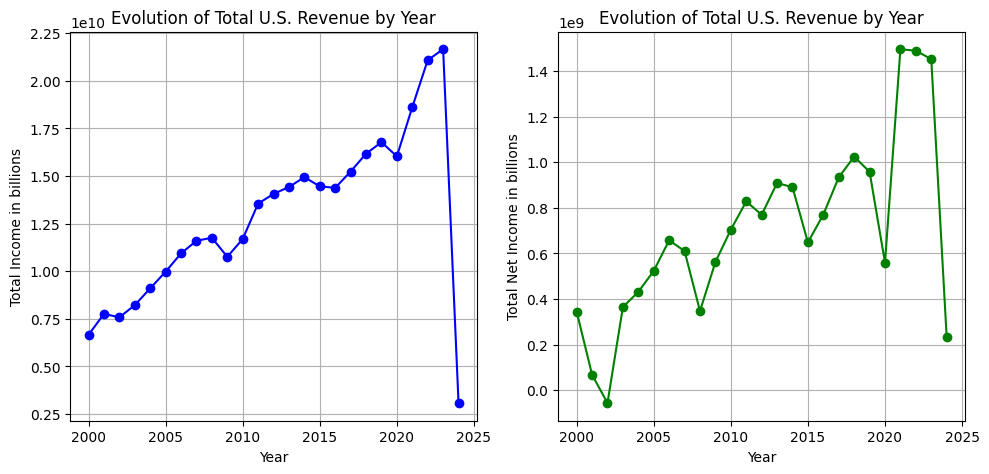

In [ ]:
plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.plot(revenue_and_income_by_year_df['Year'], revenue_and_income_by_year_df['Total Revenue'], marker='o', color='blue')
plt.title("Evolution of Total U.S. Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Total Income in billions")
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(revenue_and_income_by_year_df['Year'], revenue_and_income_by_year_df['Total Net Income'], marker='o', color='green')
plt.title("Evolution of Total U.S. Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Total Net Income in billions")
plt.grid(True)

plt.tight_layout()
plt.show()

- **How total revenue and total net income of all US firms has changed over the years? Do a table and/or graph and explain**

The graphs illustrate the changes in total revenue and total net income of all U.S. firms from 2000 to 2024.

### Total Revenue (Left Graph):
- The total revenue of U.S. firms shows a steady increase from 2000 to around 2015, reflecting a period of economic expansion.
- There is a noticeable sharp increase around 2020, potentially indicating a rapid recovery from economic downturns like the COVID-19 pandemic.
- However, a significant drop is visible in 2024, which might be indicative of an economic recession or market contraction.

### Total Net Income (Right Graph):
- The total net income also shows fluctuations, with a decline observed around the early 2000s, likely corresponding to the dot-com bubble burst and the ensuing recession.
- The period from 2008 reflects another dip, aligning with the Great Recession due to the U.S. housing market collapse.
- Post-2010, there is a gradual recovery and growth in net income, although it remains volatile.
- A dramatic increase is seen around 2020, potentially due to government stimulus and recovery efforts post-COVID-19, followed by another sharp decline in 2024.

### Economic Context:
These graphs capture key economic events, such as:
- **The Dot-com Bubble (2000-2002):** A severe decline due to the burst of the dot-com bubble.
- **The Great Recession (2008):** A major economic downturn due to the housing market crisis.
- **COVID-19 Pandemic (2020):** Significant fluctuations due to the global health crisis.
- **Economic Recessions (Various Years):** Multiple periods where economic contractions are evident, affecting overall revenue and net income.

These graphs do not just show numerical trends; they tell the broader story of economic fluctuations, recoveries, and recessions over the years.


# 1.4 Learing about one industry

In [ ]:
manufacturing_data = data[data['industria'] == 'Industrias manufactureras']
print(f"Número de empresas en 'Manufacturing industries': {manufacturing_data.shape[0]}")

Número de empresas en 'Manufacturing industries': 227242


# DESCRIPTIVE STATISTICS FOR *'Industrias manufactureras'*
---

Comparison: Using mean v.s. median

## Descriptive Statistics using mean:


In [ ]:
# Filtrar los datos para "Industrias manufactureras", mes fiscal 12 y año 2023
filtered_data = data[
    # INDUSTRIA MANUFACTURERA
    (data['industria'] == 'Industrias manufactureras') &
    (data['fiscalmonth'].isin([10, 11, 12])) &
    (data['year'] == 2023)
].copy()  # Usar .copy() para crear una copia explícita del DataFrame

# Definir las sumas de los totales para cada ratio
total_netincome = filtered_data['NETINCOME'].sum()
total_bookvalue = filtered_data['BOOKVALUE'].sum()
total_revenue = filtered_data['revenue'].sum()
total_currentassets = filtered_data['currentassets'].sum()
total_currentliabilities = filtered_data['currentliabilities'].sum()
total_totalliabilities = filtered_data['totalliabilities'].sum()
total_grossprofit = filtered_data['GROSSPROFIT'].sum()

# Calcular los promedios ponderados usando la suma de los numeradores entre la suma de los denominadores
weighted_average_ROE = total_netincome / total_bookvalue
weighted_average_CURRENTRATIO = total_currentassets / total_currentliabilities
weighted_average_DEBTTOEQUITY = total_totalliabilities / total_bookvalue
weighted_average_GROSSMARGIN = total_grossprofit / total_revenue

# Calcular promedios no ponderados para cada ratio en el conjunto de datos filtrados
average_ROE = filtered_data['ROE'].mean()
average_CURRENTRATIO = filtered_data['CURRENTRATIO'].mean()
average_DEBTTOEQUITY = filtered_data['DEBTTOEQUITY'].mean()
average_GROSSMARGIN = filtered_data['GROSSMARGIN'].mean()

# Crear un DataFrame para comparar los resultados
comparison = pd.DataFrame({
    'Ratio': ['ROE', 'Current Ratio', 'Debt to Equity', 'Gross Margin'],
    'Weighted Average': [
        weighted_average_ROE,
        weighted_average_CURRENTRATIO,
        weighted_average_DEBTTOEQUITY,
        weighted_average_GROSSMARGIN
    ],
    'Non-Weighted Average': [
        average_ROE,
        average_CURRENTRATIO,
        average_DEBTTOEQUITY,
        average_GROSSMARGIN
    ]
})

# Calcular la diferencia entre los promedios ponderados y no ponderados
comparison['Difference'] = comparison['Weighted Average'] - comparison['Non-Weighted Average']

print(comparison)

filtered_data.describe()


            Ratio  Weighted Average  Non-Weighted Average  Difference
0             ROE          0.161363             -0.638058    0.799421
1   Current Ratio          1.453315              4.412841   -2.959526
2  Debt to Equity          1.632853             -0.215836    1.848689
3    Gross Margin          0.349513                  -inf         inf


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,currentassets,...,cc_return_y,cc_return_q_future,cc_return_y_future,ROE,CURRENTRATIO,DEBTTOEQUITY,GROSSMARGIN,EPS,EPSP,BOOKTOMARKETR
count,1471.0,1.471000e+03,1.471000e+03,1.468000e+03,1.471000e+03,1.468000e+03,1.471000e+03,1.471000e+03,1.471000e+03,1.471000e+03,...,1381.000000,1412.000000,179.000000,1468.000000,1468.000000,1471.000000,1277.000000,1463.000000,1411.000000,1414.000000
mean,12.0,4.656406e+06,3.028930e+06,1.095830e+06,3.962031e+03,3.100249e+04,5.170336e+04,9.696469e+04,6.844456e+06,2.362879e+06,...,-0.177627,0.014618,-0.049106,-0.638058,4.412841,-0.215836,-inf,NaN,-0.764443,0.529188
std,0.0,1.973081e+07,1.379041e+07,4.143295e+06,3.252167e+05,6.567936e+05,2.080402e+05,7.236575e+05,2.551226e+07,8.871613e+06,...,0.844640,0.408630,0.696544,10.542117,5.940624,57.254403,NaN,NaN,3.673752,2.467241
min,12.0,-2.850818e+03,-7.121100e+04,-5.529000e+05,-6.634000e+06,-1.491000e+06,-9.100000e+05,-5.001000e+06,4.355000e+00,4.341000e+00,...,-5.973932,-2.971458,-3.238073,-205.424560,0.016464,-2130.757991,-inf,-inf,-88.073356,-71.243809
25%,12.0,8.564000e+03,1.850000e+01,4.539008e+04,-1.018500e+03,0.000000e+00,-7.075000e+02,0.000000e+00,9.825300e+04,6.742450e+04,...,-0.418452,-0.119220,-0.308672,-0.574304,1.612658,0.230283,0.251689,-1.626736,-0.384482,0.174960
50%,12.0,2.687200e+05,1.189750e+05,1.728275e+05,0.000000e+00,0.000000e+00,5.790000e+02,4.430000e+02,5.046920e+05,3.130000e+05,...,-0.007329,0.039376,0.089069,0.002518,2.571273,0.717105,0.411874,-0.248218,-0.033767,0.396631
75%,12.0,2.222889e+06,1.402631e+06,5.634562e+05,3.116541e+03,0.000000e+00,2.715000e+04,2.700150e+04,2.732000e+06,1.162872e+06,...,0.280945,0.173061,0.341722,0.164032,4.840636,1.500142,0.689299,1.967427,0.039129,0.780596
max,12.0,3.832850e+08,2.299140e+08,6.489100e+07,7.129000e+06,2.182700e+07,2.875000e+06,1.674100e+07,3.763170e+08,1.435660e+08,...,3.012013,2.256863,1.418209,92.904437,96.915935,294.844538,1.187458,inf,1.519615,16.526703


## Descriptive Statistics using median

In [ ]:
# Filtrar los datos para "Industrias manufactureras", último trimestre (Q4) y año 2023
filtered_data = data[
    (data['industria'] == 'Industrias manufactureras') &
    (data['fiscalmonth'].isin([10, 11, 12])) &  # Filtrar por los meses del último trimestre
    (data['year'] == 2023)
].copy()  # Usar .copy() para crear una copia explícita del DataFrame

# Definir las sumas de los totales para cada ratio
total_netincome = filtered_data['NETINCOME'].sum()
total_bookvalue = filtered_data['BOOKVALUE'].sum()
total_revenue = filtered_data['revenue'].sum()
total_currentassets = filtered_data['currentassets'].sum()
total_currentliabilities = filtered_data['currentliabilities'].sum()
total_totalliabilities = filtered_data['totalliabilities'].sum()
total_grossprofit = filtered_data['GROSSPROFIT'].sum()

# Calcular las medianas para variables financieras relevantes
median_BOOKVALUE = filtered_data['BOOKVALUE'].median()
median_MARKETVALUE = filtered_data['MARKETVALUE'].median()
median_REVENUE = filtered_data['revenue'].median()

# Calcular las medianas para cada ratio en el conjunto de datos filtrados
median_ROE = filtered_data['ROE'].median()
median_CURRENTRATIO = filtered_data['CURRENTRATIO'].median()
median_DEBTTOEQUITY = filtered_data['DEBTTOEQUITY'].median()
median_GROSSMARGIN = filtered_data['GROSSMARGIN'].median()

# Calcular promedios ponderados usando la suma del numerador entre la suma del denominador
weighted_average_ROE = total_netincome / total_bookvalue
weighted_average_CURRENTRATIO = total_currentassets / total_currentliabilities
weighted_average_DEBTTOEQUITY = total_totalliabilities / total_bookvalue
weighted_average_GROSSMARGIN = total_grossprofit / total_revenue

# Crear un DataFrame para comparar los resultados
comparison = pd.DataFrame({
    'Ratio': ['ROE', 'Current Ratio', 'Debt to Equity', 'Gross Margin'],
    'Weighted Average': [
        weighted_average_ROE,
        weighted_average_CURRENTRATIO,
        weighted_average_DEBTTOEQUITY,
        weighted_average_GROSSMARGIN
    ],
    'Median': [
        median_ROE,
        median_CURRENTRATIO,
        median_DEBTTOEQUITY,
        median_GROSSMARGIN
    ]
})

# Calcular la diferencia entre los promedios ponderados y la mediana
comparison['Difference'] = comparison['Weighted Average'] - comparison['Median']

print(comparison)

# Mostrar las medianas de las variables financieras relevantes
print(f"Median Book Value: {median_BOOKVALUE}")
print(f"Median Market Value: {median_MARKETVALUE}")
print(f"Median Revenue: {median_REVENUE}")

# Estadística descriptiva del conjunto de datos filtrados
filtered_data.describe()


            Ratio  Weighted Average    Median  Difference
0             ROE          0.161363  0.002518    0.158845
1   Current Ratio          1.453315  2.571273   -1.117958
2  Debt to Equity          1.632853  0.717105    0.915748
3    Gross Margin          0.349513  0.411874   -0.062361
Median Book Value: 242360.0
Median Market Value: 710568.56206
Median Revenue: 268720.0


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,currentassets,...,cc_return_y,cc_return_q_future,cc_return_y_future,ROE,CURRENTRATIO,DEBTTOEQUITY,GROSSMARGIN,EPS,EPSP,BOOKTOMARKETR
count,1471.0,1.471000e+03,1.471000e+03,1.468000e+03,1.471000e+03,1.468000e+03,1.471000e+03,1.471000e+03,1.471000e+03,1.471000e+03,...,1381.000000,1412.000000,179.000000,1468.000000,1468.000000,1471.000000,1277.000000,1463.000000,1411.000000,1414.000000
mean,12.0,4.656406e+06,3.028930e+06,1.095830e+06,3.962031e+03,3.100249e+04,5.170336e+04,9.696469e+04,6.844456e+06,2.362879e+06,...,-0.177627,0.014618,-0.049106,-0.638058,4.412841,-0.215836,-inf,NaN,-0.764443,0.529188
std,0.0,1.973081e+07,1.379041e+07,4.143295e+06,3.252167e+05,6.567936e+05,2.080402e+05,7.236575e+05,2.551226e+07,8.871613e+06,...,0.844640,0.408630,0.696544,10.542117,5.940624,57.254403,NaN,NaN,3.673752,2.467241
min,12.0,-2.850818e+03,-7.121100e+04,-5.529000e+05,-6.634000e+06,-1.491000e+06,-9.100000e+05,-5.001000e+06,4.355000e+00,4.341000e+00,...,-5.973932,-2.971458,-3.238073,-205.424560,0.016464,-2130.757991,-inf,-inf,-88.073356,-71.243809
25%,12.0,8.564000e+03,1.850000e+01,4.539008e+04,-1.018500e+03,0.000000e+00,-7.075000e+02,0.000000e+00,9.825300e+04,6.742450e+04,...,-0.418452,-0.119220,-0.308672,-0.574304,1.612658,0.230283,0.251689,-1.626736,-0.384482,0.174960
50%,12.0,2.687200e+05,1.189750e+05,1.728275e+05,0.000000e+00,0.000000e+00,5.790000e+02,4.430000e+02,5.046920e+05,3.130000e+05,...,-0.007329,0.039376,0.089069,0.002518,2.571273,0.717105,0.411874,-0.248218,-0.033767,0.396631
75%,12.0,2.222889e+06,1.402631e+06,5.634562e+05,3.116541e+03,0.000000e+00,2.715000e+04,2.700150e+04,2.732000e+06,1.162872e+06,...,0.280945,0.173061,0.341722,0.164032,4.840636,1.500142,0.689299,1.967427,0.039129,0.780596
max,12.0,3.832850e+08,2.299140e+08,6.489100e+07,7.129000e+06,2.182700e+07,2.875000e+06,1.674100e+07,3.763170e+08,1.435660e+08,...,3.012013,2.256863,1.418209,92.904437,96.915935,294.844538,1.187458,inf,1.519615,16.526703


# Comparison Using Mean and Median

---

## Using Mean:

| Ratio             | Weighted Average | Non-Weighted Average | Difference |
|-------------------|-------------------|-----------------------|------------|
| ROE               | 0.161363          | -0.638058             | 0.799421   |
| Current Ratio      | 1.453315          | 4.412841              | -2.959526  |
| Debt to Equity     | 1.632853          | -0.215836             | 1.848689   |
| Gross Margin       | 0.349513          | -inf                  | inf        |

## Using Median:

| Ratio             | Weighted Average | Median  | Difference |
|-------------------|-------------------|---------|------------|
| ROE               | 0.161363          | 0.002518| 0.158845   |
| Current Ratio      | 1.453315          | 2.571273| -1.117958  |
| Debt to Equity     | 1.632853          | 0.717105| 0.915748   |
| Gross Margin       | 0.349513          | 0.411874| -0.062361  |

### 2. Interpretation of Improvements from Mean to Median

- **ROE (Return on Equity)**:
  - **Weighted Average (Mean)**: 0.161363
  - **Median**: 0.002518
  - **Difference**: 0.158845
  - **Interpretation**: The weighted average ROE is significantly higher than the median, indicating that a few firms with very high ROE are significantly influencing the weighted average. The median ROE, being closer to zero, shows a more accurate picture of the typical firm's performance, suggesting that most firms have a much lower or near-zero return on equity.

- **Current Ratio**:
  - **Weighted Average (Mean)**: 1.453315
  - **Median**: 2.571273
  - **Difference**: -1.117958
  - **Interpretation**: The weighted average current ratio is much lower than the median, revealing that firms with smaller total assets often have higher current ratios. In contrast, larger firms (weighted by total assets) have lower liquidity, making the median a better indicator of typical liquidity levels.

- **Debt to Equity Ratio**:
  - **Weighted Average (Mean)**: 1.632853
  - **Median**: 0.717105
  - **Difference**: 0.915748
  - **Interpretation**: The weighted average debt-to-equity ratio is higher than the median, suggesting that firms with very high levels of debt or negative equity are disproportionately affecting the average. The median provides a more accurate reflection of the typical firm's leverage, avoiding distortion from extreme values.

- **Gross Margin**:
  - **Weighted Average (Mean)**: 0.349513
  - **Median**: 0.411874
  - **Difference**: -0.062361
  - **Interpretation**: The weighted average gross margin is slightly lower than the median, indicating that while larger firms (weighted by total assets) have a lower average gross margin, the median suggests that most firms have a higher gross margin. This difference highlights that larger firms may face different cost structures compared to the majority.

## WHY MEDIAN INSTEAD OF MEAN?
---

the median is preferred over the mean because:

### Robustness to Outliers:
The mean (average) can be heavily influenced by outliers or extreme values. For example, a company with extremely high revenues could distort the average, making it an inadequate reflection of the typical value for most companies in the dataset. In contrast, the median, being the central value in an ordered dataset, is not affected by these extreme values.

### Representativeness in Skewed Distributions
In financial data, distributions are often skewed (e.g., many small companies and a few very large ones). The median provides a better representation of the "center" of the distribution, as it indicates the point where half of the observations are above and half are below, regardless of how the extreme values are distributed.

### 2. Summary Interpretation:

The statistics provided show considerable variability across firms in the dataset:

- **Median as the Preferred Measure**:
  The medians are often quite different from the means for most variables, indicating the presence of outliers or skewed distributions. In these cases, the median is a more robust and representative measure of central tendency, as it is not as heavily influenced by extreme values as the mean.

- **Differences Between Firms**:
  The wide ranges (minimum to maximum) for each variable indicate diverse financial health and performance among the firms. It is essential to consider both the median and weighted measures when assessing overall financial trends to avoid skewed interpretations due to a few extreme values.

### Conclusion:
The descriptive statistics highlight the importance of using the **median** over the mean for financial variables in datasets with multiple firms. Medians provide a more reliable measure of the central tendency, minimizing the influence of outliers or extreme values and giving a clearer picture of the typical firm's financial characteristics.

# 1.4.2 Correlation matrix

*Using annual fiscal data (selecting rows with fiscalmonth=12), and all years:*

*Show a correlation matrix with the same variables you used for descriptive statistics above, but in the case of totalassets, revenue and netincome, use the logarithmic transformation of their values. Which variables have strongest and significant linear relationship with stock returns (annual returns)? Explain*

Correlation Matrix:

                    cc_return_y_future  totalassets  revenue  NETINCOME   ROE  \
cc_return_y_future                1.00         0.13     0.15       0.11 -0.00   
totalassets                       0.13         1.00     0.90       0.71  0.02   
revenue                           0.15         0.90     1.00       0.81  0.02   
NETINCOME                         0.11         0.71     0.81       1.00  0.02   
ROE                              -0.00         0.02     0.02       0.02  1.00   
CURRENTRATIO                      0.02        -0.12    -0.11      -0.07  0.01   
DEBTTOEQUITY                     -0.03         0.01     0.01       0.00  0.32   
GROSSMARGIN                      -0.01         0.01     0.00       0.01  0.00   
BOOKVALUE                         0.07         0.87     0.77       0.58  0.02   
MARKETVALUE                       0.14         0.64     0.70       0.89  0.02   
EPSP                              0.38         0.06     0.05       0.04  0.01   
BOOKTOM

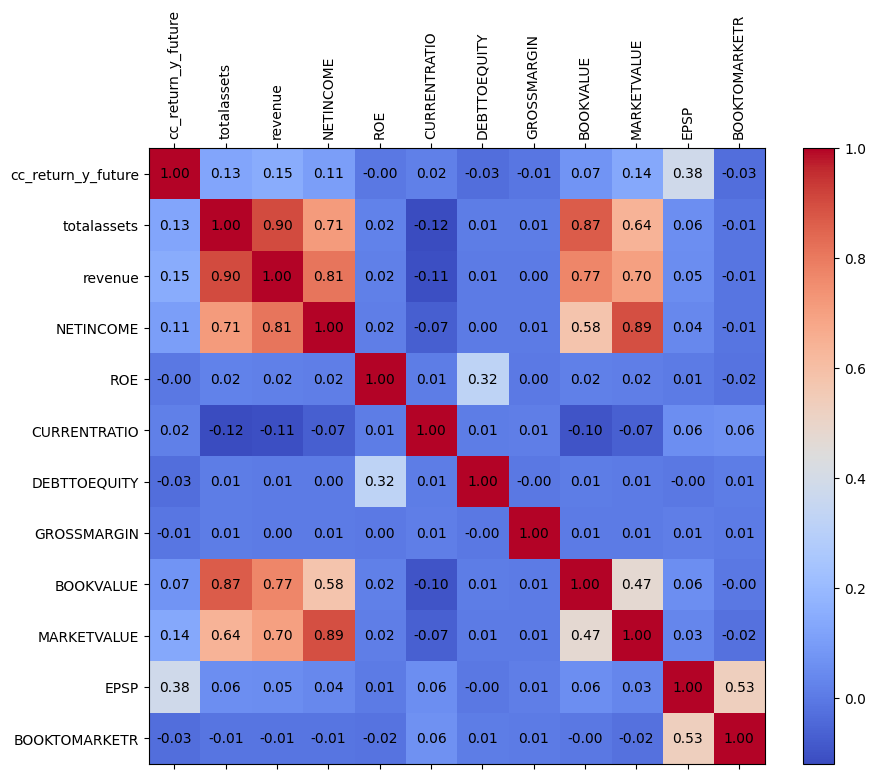

In [ ]:
# Filtrar los datos para "Industrias manufactureras" y mes fiscal 12
manufacturing_data = data[
    (data['industria'] == 'Industrias manufactureras') &
    (data['fiscalmonth'] == 12) &
    (data['year'] == 2023)
].copy()

# Calcular la matriz de correlación
correlation_matrix = manufacturing_data[[
    'cc_return_y_future',
    'totalassets',
    'revenue',
    'NETINCOME',
    'ROE',
    'CURRENTRATIO',
    'DEBTTOEQUITY',
    'GROSSMARGIN',
    'BOOKVALUE',
    'MARKETVALUE',
    'EPSP',
    'BOOKTOMARKETR'
]].corr()

print("Correlation Matrix:\n")
print(correlation_matrix.round(2))

# Visualizar la matriz de correlación
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')  # Añadir cmap para mejor visualización
fig.colorbar(cax)

# Configurar etiquetas de los ejes
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

# Añadir los valores de correlación en cada celda
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                ha='center', va='center', color='black')

plt.show()



# Interpretation:

1. **Stock Returns (`cc_return_y_future`):**
   - **Revenue:** Shows a modest positive correlation of 0.15, indicating a slight tendency for higher revenue to be associated with higher stock returns.
   - **Total Assets:** Exhibits a low positive correlation of 0.13, suggesting a minimal relationship with stock returns.
   - **Market Value:** Correlates positively at 0.14, indicating a small positive relationship with stock returns.
   - **EPSP (Earnings per Share):** Shows the strongest positive correlation at 0.39, suggesting a moderate relationship where higher EPSP tends to be associated with higher stock returns.
   - **Net Income:** Displays a low positive correlation of 0.11, indicating a weak relationship.
   - **ROE (Return on Equity):** Has a negligible negative correlation of -0.01, showing almost no relationship.
   - **Debt to Equity Ratio:** Exhibits a slight negative correlation of -0.03 with stock returns.
   - **Gross Margin:** Shows a minimal negative correlation of -0.00.
   - **Book Value:** Shows a weak positive correlation of 0.07 with stock returns.
   - **Book to Market Ratio:** Displays a very weak negative correlation of -0.04 with stock returns.

2. **Relationships Among Other Variables:**
   - **Total Assets, Revenue, and Net Income:** These variables have strong positive correlations with each other, indicating they tend to move together.
   - **Book Value and Market Value:** Have a strong positive correlation of 0.65, suggesting they are closely related.
   - **EPSP and Book to Market Ratio:** Show a strong negative correlation of -0.53, indicating that higher EPSP is associated with a lower Book to Market Ratio.

### Summary:
The correlations between `cc_return_y_future` (stock returns) and other financial variables are generally low, with the highest being 0.39 with EPSP, suggesting a moderate relationship.

# 1.4.3 Regression Model

*For each financial ratio, do the following:*

- *Do a histogram and interpret it*

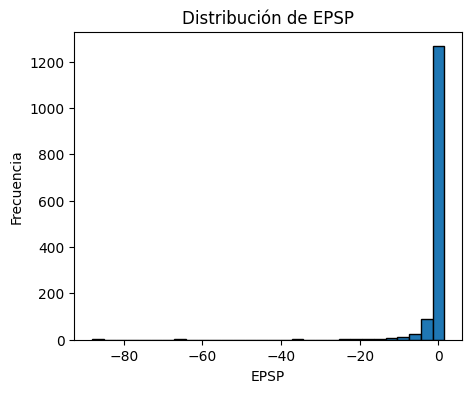

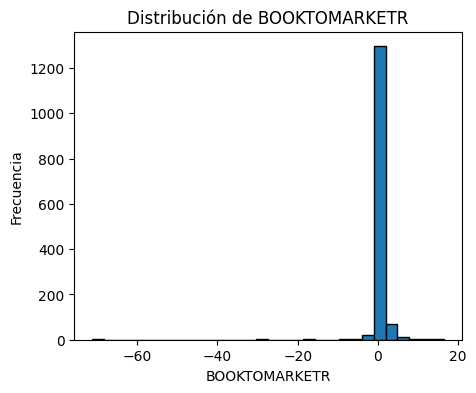

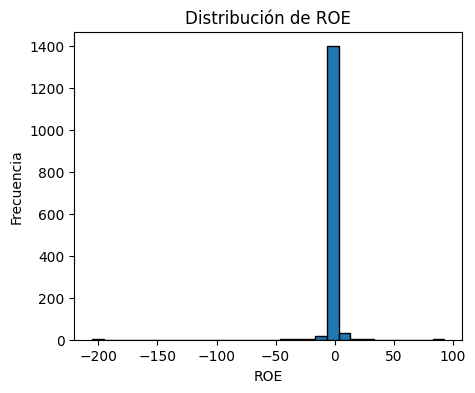

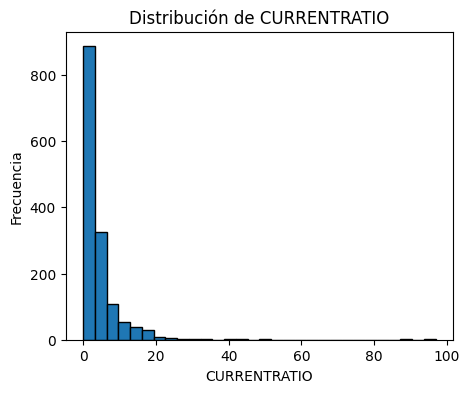

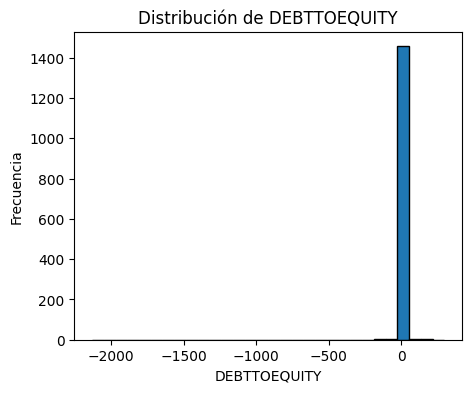

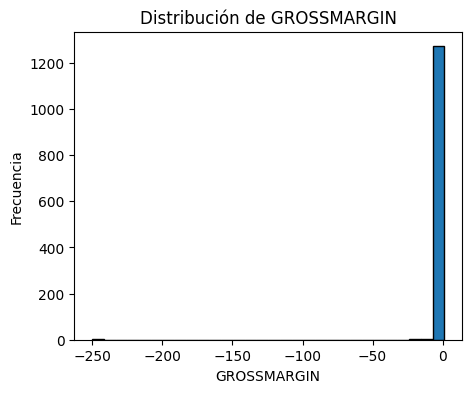

In [ ]:
# Filtrar datos para la industria manufacturera, mes fiscal 12 y año 2023
manufacturing_data = data[
    (data['industria'] == 'Industrias manufactureras') &
    (data['fiscalmonth'] == 12) &
    (data['year'] == 2023)
].copy()

# Lista de ratios a graficar
ratios = ['EPSP', 'BOOKTOMARKETR', 'ROE', 'CURRENTRATIO', 'DEBTTOEQUITY', 'GROSSMARGIN']

for ratio in ratios:
    plt.figure(figsize=(5, 4))

    # Filtrar valores no finitos
    ratio_data = manufacturing_data[ratio].replace([np.inf, -np.inf], np.nan).dropna()

    # Graficar histograma
    plt.hist(ratio_data, bins=30, edgecolor='black')
    plt.title(f'Distribución de {ratio}')
    plt.xlabel(ratio)
    plt.ylabel('Frecuencia')
    plt.show()


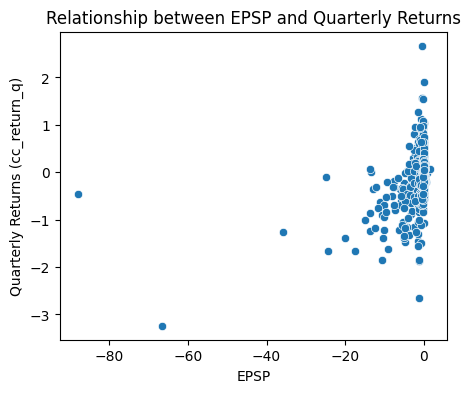

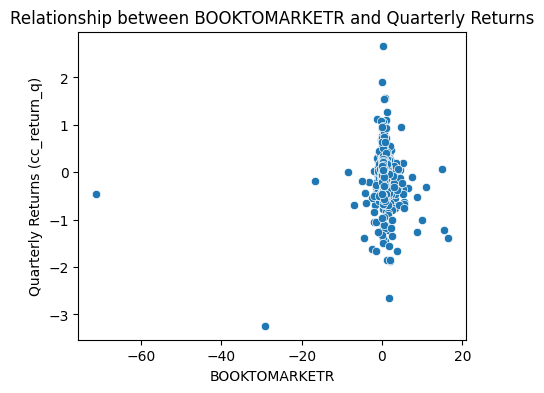

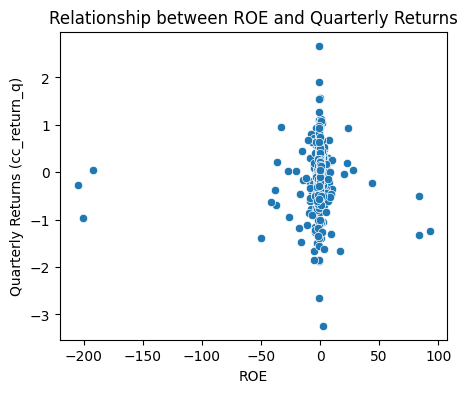

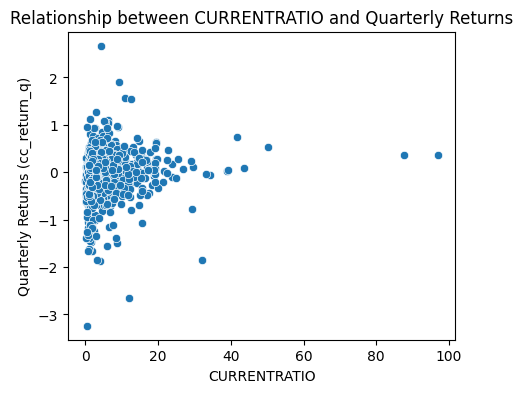

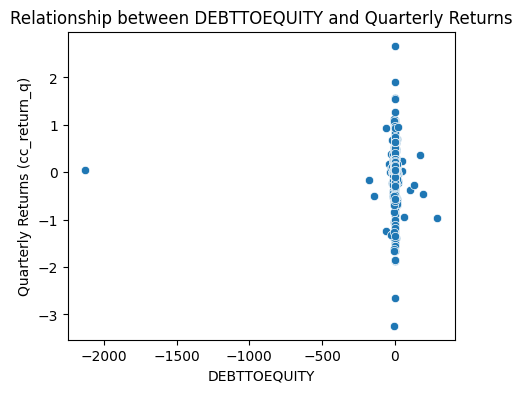

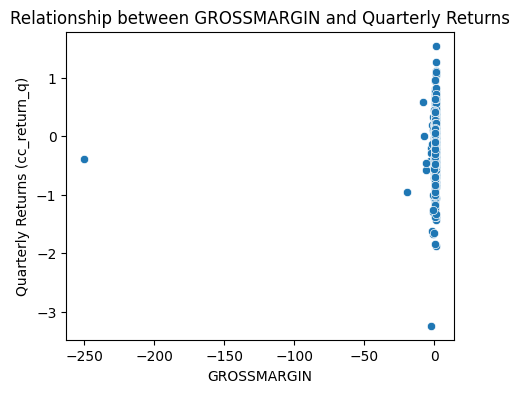

In [ ]:

for ratio in ratios:
    plt.figure(figsize=(5, 4))

    # Graficar scatter plot
    sns.scatterplot(x=manufacturing_data[ratio], y=manufacturing_data['cc_return_q'])
    plt.title(f'Relationship between {ratio} and Quarterly Returns')
    plt.xlabel(ratio)
    plt.ylabel('Quarterly Returns (cc_return_q)')
    plt.show()


In [ ]:
X = manufacturing_data[ratios]
y = manufacturing_data['cc_return_q_future']

X.head()


,,EPSP,BOOKTOMARKETR,ROE,CURRENTRATIO,DEBTTOEQUITY,GROSSMARGIN
firm,qdate,,,,,,
A,2023Q4,0.030440,0.143484,0.212147,2.611354,0.841403,0.507098
AA,2023Q4,-0.107283,0.963243,-0.111377,1.453795,1.421728,0.069946
AAOI,2023Q4,-0.081635,0.312962,-0.260847,1.848851,0.811271,0.270719
AAON,2023Q4,0.029596,0.122506,0.241590,3.226487,0.280475,0.341475
AAPL,2023Q3,0.036236,0.023217,1.560760,0.988012,4.673462,0.441311


In [ ]:
data_for_model_x = manufacturing_data[['EPSP', 'BOOKTOMARKETR', 'ROE', 'CURRENTRATIO', 'DEBTTOEQUITY', 'GROSSMARGIN']]
data_for_model_y = manufacturing_data['cc_return_q_future']

# Reemplazar valores infinitos por NaN
data_for_model_x = data_for_model_x.replace([np.inf, -np.inf], np.nan)

# Volver a eliminar filas con valores faltantes
data_for_model_x = data_for_model_x.dropna()
data_for_model_y = data_for_model_y.loc[data_for_model_x.index]

print(f"Dimensiones de X después de reemplazar infinitos: {data_for_model_x.shape}")
print(f"Dimensiones de Y después de reemplazar infinitos: {data_for_model_y.shape}")

data_for_model_x = data_for_model_x.dropna()
data_for_model_y = data_for_model_y.loc[data_for_model_x.index]

# Guardo la data para el siguiente modelo sin modificarla ni nada
data_for_model_x2 = data_for_model_x

data_for_model_x = sm.add_constant(data_for_model_x)

# Verificar valores faltantes e infinitos en X e Y
print("Valores NaN en X:")
print(data_for_model_x.isna().sum())
print("Valores infinitos en X:")
print((data_for_model_x == np.inf).sum())
print("Valores infinitos en X:")
print((data_for_model_x == -np.inf).sum())

print("Valores NaN en Y:")
print(data_for_model_y.isna().sum())
print("Valores infinitos en Y:")
print((data_for_model_y == np.inf).sum())
print("Valores infinitos en Y:")
print((data_for_model_y == -np.inf).sum())




Dimensiones de X después de reemplazar infinitos: (1223, 6)
Dimensiones de Y después de reemplazar infinitos: (1223,)
Valores NaN en X:
const            0
EPSP             0
BOOKTOMARKETR    0
ROE              0
CURRENTRATIO     0
DEBTTOEQUITY     0
GROSSMARGIN      0
dtype: int64
Valores infinitos en X:
const            0
EPSP             0
BOOKTOMARKETR    0
ROE              0
CURRENTRATIO     0
DEBTTOEQUITY     0
GROSSMARGIN      0
dtype: int64
Valores infinitos en X:
const            0
EPSP             0
BOOKTOMARKETR    0
ROE              0
CURRENTRATIO     0
DEBTTOEQUITY     0
GROSSMARGIN      0
dtype: int64
Valores NaN en Y:
3
Valores infinitos en Y:
0
Valores infinitos en Y:
0


In [ ]:
model = sm.OLS(data_for_model_y, data_for_model_x, missing="drop").fit()

# Imprimir el resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     cc_return_q_future   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     16.98
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           6.66e-19
Time:                        16:32:53   Log-Likelihood:                -452.54
No. Observations:                1220   AIC:                             919.1
Df Residuals:                    1213   BIC:                             954.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0080      0.013      0.612

# Regression Model Interpretation
---



## Interpretation:

1. **Model Fit:**
   - **R-squared**: 0.077 — This indicates that the model explains 7.7% of the variance in the dependent variable (`cc_return_q_future`). This suggests a relatively low level of explanatory power and highlights that there is considerable variability in the outcome that is not captured by the model.
   - **Adj. R-squared**: 0.073 — The adjusted R-squared is slightly lower than R-squared, accounting for the number of predictors. This confirms that the model has limited explanatory power, and there may be room for improvement in the predictor selection.
   - **F-statistic**: 16.98 with a **Prob (F-statistic)** of 6.66e-19 — The F-statistic is statistically significant, indicating that the overall regression model is significant. This suggests that at least one of the predictors contributes meaningfully to explaining the dependent variable.

2. **Coefficients and Their Significance:**
   - **const (Constant/Intercept)**: 0.0080 — The constant term represents the expected value of `cc_return_q_future` when all independent variables are zero. It is not statistically significant (p-value = 0.541), suggesting that there is no significant baseline effect when all predictors are zero.
   - **EPSP**: 0.0290 — The coefficient is positive and statistically significant (p-value = 0.000), indicating that higher EPSP is associated with higher future quarterly returns. Specifically, a one-unit increase in EPSP is associated with an increase of 0.0290 units in `cc_return_q_future`.
   - **BOOKTOMARKETR**: -0.0177 — This coefficient is negative and statistically significant (p-value = 0.000), suggesting that higher book-to-market ratio is associated with lower future returns. A one-unit increase in BOOKTOMARKETR is associated with a decrease of 0.0177 units in `cc_return_q_future`.
   - **ROE**: -0.0003 — The coefficient is negative but not statistically significant (p-value = 0.731), indicating that ROE does not have a meaningful linear relationship with future returns in this model.
   - **CURRENTRATIO**: 0.0061 — This coefficient is positive and statistically significant (p-value = 0.003), suggesting a positive relationship between CURRENTRATIO and future returns. A one-unit increase in CURRENTRATIO is associated with an increase of 0.0061 units in `cc_return_q_future`.
   - **DEBTTOEQUITY**: 0.0001 — This coefficient is very small and not statistically significant (p-value = 0.399), indicating that DEBTTOEQUITY does not significantly impact future returns.
   - **GROSSMARGIN**: 0.0019 — This coefficient is positive but not statistically significant (p-value = 0.176), suggesting that GROSSMARGIN does not have a significant effect on future returns in this context.

3. **T & P - Value:**
   - **const (Intercept)**:
     - **t-value**: 0.612 — The absolute t-value is less than 2, suggesting that the intercept is not significantly different from zero.
     - **p-value**: 0.541 — The p-value is greater than 0.05, indicating that the intercept is not statistically significant. This means the baseline value of `cc_return_q_future` when all predictors are zero is not significantly different from zero.

   - **EPSP**:
     - **t-value**: 9.237 — The high absolute t-value indicates a strong effect.
     - **p-value**: 0.000 — The p-value is less than 0.01, showing that EPSP is highly significant. This suggests that EPSP has a meaningful positive relationship with `cc_return_q_future`.

   - **BOOKTOMARKETR**:
     - **t-value**: -3.754 — The negative t-value suggests a strong negative effect.
     - **p-value**: 0.000 — The p-value is less than 0.01, indicating that BOOKTOMARKETR is highly significant. This suggests that the book-to-market ratio has a significant negative effect on `cc_return_q_future`.

   - **ROE**:
     - **t-value**: -0.344 — The low t-value indicates that ROE has a weak effect.
     - **p-value**: 0.731 — The p-value is much higher than 0.05, suggesting that ROE is not statistically significant in predicting `cc_return_q_future`.

   - **CURRENTRATIO**:
     - **t-value**: 2.991 — The absolute t-value indicates a moderate effect.
     - **p-value**: 0.003 — The p-value is less than 0.05, suggesting that CURRENTRATIO is statistically significant. This indicates a positive relationship between CURRENTRATIO and `cc_return_q_future`.

   - **DEBTTOEQUITY**:
     - **t-value**: 0.844 — The t-value is relatively low, indicating minimal effect.
     - **p-value**: 0.399 — The high p-value indicates that DEBTTOEQUITY is not statistically significant in predicting `cc_return_q_future`.

   - **GROSSMARGIN**:
     - **t-value**: 1.354 — The t-value suggests a weak effect.
     - **p-value**: 0.176 — The p-value is greater than 0.05, indicating that GROSSMARGIN is not statistically significant. This suggests a minimal relationship between GROSSMARGIN and `cc_return_q_future`.

### Conclusion:

The OLS regression model explains only 7.7% of the variance in future quarterly returns (`cc_return_q_future`), indicating a low fit. Significant predictors include `EPSP` and `BOOKTOMARKETR`, which have a meaningful impact on future returns. However, the model's overall explanatory power is limited, and the results suggest potential areas for refinement, including exploring additional predictors or data transformations to enhance model performance.

# Matrix Algebra
---

Multicollinearity

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Drop rows with NaN values
X = X.dropna()

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Step 2: Drop NaN values (if any)
X_scaled = X_scaled.dropna()

# Step 3: Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

# Step 4: Interpretation of VIF values
for num, i in enumerate(vif_data['VIF']):
    if i > 10:
        print('High multicollinearity, beta', num, i)
    elif i > 5:
        print('Moderate correlation that could be concerning, beta', num, i)
    elif 1 < i <= 5:
        print('Some correlation between independent variables, not enough to be concerning, beta', num, i)
    else:
        print('Ideal scenario, beta', num, i)

print(vif_data)


Some correlation between independent variables, not enough to be concerning, beta 0 1.4515754136689043
Some correlation between independent variables, not enough to be concerning, beta 1 1.4527425876725721
Some correlation between independent variables, not enough to be concerning, beta 2 1.129952381831805
Some correlation between independent variables, not enough to be concerning, beta 3 1.0039503114181343
Some correlation between independent variables, not enough to be concerning, beta 4 1.129894386770814
Some correlation between independent variables, not enough to be concerning, beta 5 1.0002852873972
        Variable       VIF
0           EPSP  1.451575
1  BOOKTOMARKETR  1.452743
2            ROE  1.129952
3   CURRENTRATIO  1.003950
4   DEBTTOEQUITY  1.129894
5    GROSSMARGIN  1.000285


<ipython-input-177-f2b989aa2106>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)


# Coefficients

In [ ]:
# Filtrar datos para la industria manufacturera, mes fiscal 12 y año 2023
filtered_data = data[
    (data['industria'] == 'Industrias manufactureras') &
    (data['fiscalmonth'] == 12) &
    (data['year'] == 2023)
].copy()

# Lista de ratios a incluir en el modelo
ratios = ['EPSP', 'BOOKTOMARKETR', 'ROE', 'CURRENTRATIO', 'DEBTTOEQUITY', 'GROSSMARGIN']
X = filtered_data[ratios]
y = filtered_data['cc_return_q_future']

# Reemplazar valores infinitos y eliminar filas con valores faltantes en X e y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]  # Asegurarse de que y corresponda a las filas restantes en X

# Añadir una constante para el intercepto
X = sm.add_constant(X)


# Elimina NaNs en X y y
X_cleaned = X.dropna()
y_cleaned = y.dropna()

# Alinea X y y para asegurar que tienen las mismas filas
X_aligned, y_aligned = X_cleaned.align(y_cleaned, axis=0, join='inner')

# Convierte a arrays numpy
X_array = X_aligned.to_numpy()
y_array = y_aligned.to_numpy()

# Ensure the list of variables matches those used in X
variables = ['const'] + ratios  # 'const' for the intercept added by sm.add_constant
vif_data = pd.DataFrame()
vif_data["Variable"] = variables

# Compute the variance inflation factor (VIF)
vif_data["VIF"] = [variance_inflation_factor(X_array, i) for i in range(X_array.shape[1])]

# Calculating beta coefficients
try:
    betas = np.linalg.inv(X_array.T @ X_array) @ X_array.T @ y_array
    print("Beta coefficients:")
    for i in range(len(betas)):
        print(f'{vif_data.loc[i, "Variable"]} → {betas[i]}')
except np.linalg.LinAlgError:
    print("Error calculating beta coefficients. The matrix is not invertible.")



Beta coefficients:
const → 0.008046534517921623
EPSP → 0.028990036710940928
BOOKTOMARKETR → -0.017725536535525888
ROE → -0.00032887133093634463
CURRENTRATIO → 0.006066708330001226
DEBTTOEQUITY → 0.00014385865225485954
GROSSMARGIN → 0.0018887334822501238


# Standard Deviation

In [ ]:
residuals = y_array - X_array @ betas

n, k = X_array.shape
sigma = residuals.T @ residuals / (n - k)

covariance_beta = sigma * np.linalg.inv(X_array.T @ X_array)

std_errors = np.sort(np.sqrt(np.diag(covariance_beta)))
print(f"SD")
#vif_data.loc[i,'Variable']}
for i in range(vif_data.shape[0]):
    print(f'''{vif_data.loc[i,'Variable']} → {std_errors[i]}''')

print('Promedio Std error: ',std_errors.mean())

SD
const → 0.0001704240908397371
EPSP → 0.0009561742247038487
BOOKTOMARKETR → 0.0013948118991429829
ROE → 0.0020283325326514324
CURRENTRATIO → 0.003138414929634424
DEBTTOEQUITY → 0.004721595654292947
GROSSMARGIN → 0.01315076760546539
Promedio Std error:  0.0036515029909615373


# R square and Adjusted R

In [ ]:
# Calculate the mean of y
y_bar = np.mean(y_array)

# Calculate Total Sum of Squares (SST)
SST = np.sum((y_array - y_bar) ** 2)

# Calculate Sum of Squared Residuals (SSR)
SSR = np.sum(residuals ** 2)  # `residuals` already defined in the second implementation

# Calculate R-squared
R_squared = 1 - (SSR / SST)

# Number of observations (n) and predictors (k)
n, k = X_array.shape

# Calculate Adjusted R-squared
Adjusted_R_squared = 1 - ((1 - R_squared) * (n - 1) / (n - k))

print("\nR-squared:", R_squared)
print("Adjusted R-squared:", Adjusted_R_squared)



R-squared: 0.07746770062928465
Adjusted R-squared: 0.07290447408664302


In [ ]:
X = X.values
# Calculate Hat Matrix
hat_matrix = X @ np.linalg.inv(X.T @ X) @ X.T
hat_matrix_diag = np.diag(hat_matrix)
hat_matrix.shape

(1223, 1223)

In [ ]:
# Identify Leverage Points
p = X.shape[1]
n = X.shape[0]
leverage_threshold = 2 * p / n
leverage_points = np.diag(hat_matrix) > leverage_threshold

print(f"\nNumber of Leverage Points: {np.sum(leverage_points)}")
print(f"Leverage Threshold: {leverage_threshold}")


Number of Leverage Points: 36
Leverage Threshold: 0.011447260834014717


In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence
# Calculate Studentized Residuals
influence = OLSInfluence(model)
studentized_residuals = influence.resid_studentized_external

# Identify Outliers
outlier_threshold = 3
outliers = np.abs(studentized_residuals) > outlier_threshold

print(f"\nNumber of Outliers (Studentized Residuals): {np.sum(outliers)}")


Number of Outliers (Studentized Residuals): 28


In [ ]:
# Calculate Cook's Distance
cooks_distance = influence.cooks_distance[0]

# Identify Outliers
outlier_threshold = 5 / n
outliers = cooks_distance > outlier_threshold

print(f"\nNumber of Outliers (Cook's Distance): {np.sum(outliers)}")


Number of Outliers (Cook's Distance): 31


In [ ]:
# Identify Influential Observations
influential_observations = (np.abs(studentized_residuals) > 2) & (cooks_distance > 4 / n)

print(f"\nNumber of Influential Observations: {np.sum(influential_observations)}")


Number of Influential Observations: 22


In [ ]:
# List Influential Observations
influential_indices = np.where(influential_observations)[0]
print("\nInfluential Observation Indices:", influential_indices)


Influential Observation Indices: [  33   62   84  140  167  207  255  283  329  431  497  580  591  662
  750  851  889  980 1094 1166 1171 1186]


In [ ]:
print(data_for_model_x2.shape)
print(data_for_model_y.shape)

(1223, 6)
(1223,)


There is a total of 22 influential values, so that means that:

22/1223 = 0.01798

Therefore the windsorization should be of 0.018.

In [ ]:
data_winsorized = data_for_model_x2.apply(lambda x: winsorize(x, limits=[0.018, 0.018]))

In [ ]:
data_winsorized.describe()

,EPSP,BOOKTOMARKETR,ROE,CURRENTRATIO,DEBTTOEQUITY,GROSSMARGIN
count,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000
mean,-0.498512,0.547164,-0.195980,3.474047,1.041767,0.468698
std,1.560823,0.767164,1.421708,3.073365,3.220232,0.329300
min,-9.394724,-1.338154,-6.519802,0.522673,-11.096057,-0.533753
25%,-0.244288,0.172768,-0.364665,1.597486,0.339397,0.252358
50%,0.004210,0.385798,0.048495,2.427183,0.821703,0.408086
75%,0.043725,0.739340,0.179706,4.093548,1.586015,0.687300
max,0.205206,3.617830,4.275500,15.686391,13.221949,1.000000


In [ ]:
data_winsorized = sm.add_constant(data_winsorized)
model = sm.OLS(data_for_model_y, data_winsorized, missing="drop").fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     cc_return_q_future   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     30.04
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.02e-33
Time:                        16:32:54   Log-Likelihood:                -417.21
No. Observations:                1220   AIC:                             848.4
Df Residuals:                    1213   BIC:                             884.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0925      0.021     -4.478

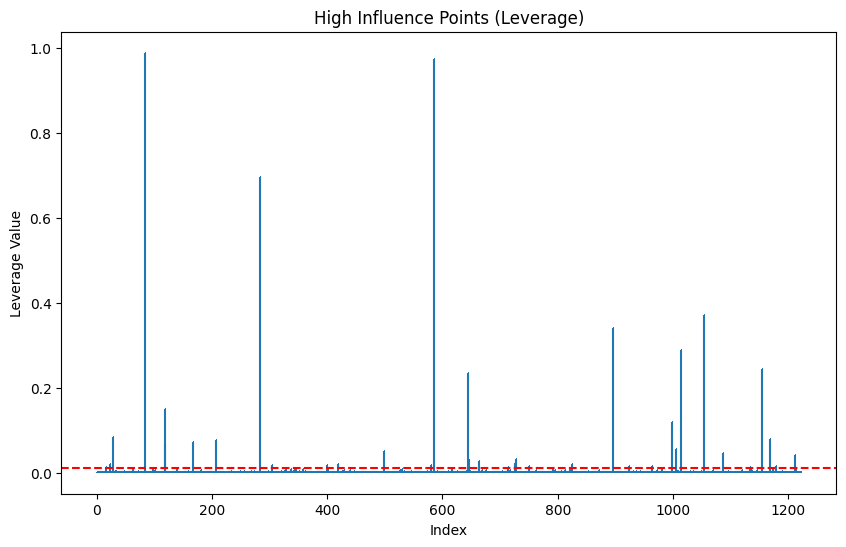

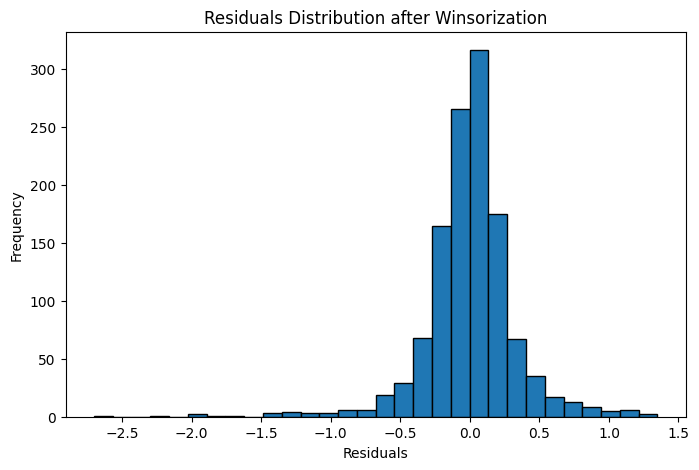

In [ ]:
# Plot of leverage points
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(hat_matrix_diag)), hat_matrix_diag, markerfmt=",", basefmt=" ")
plt.axhline(y=leverage_threshold, color='r', linestyle='--')
plt.title('High Influence Points (Leverage)')
plt.xlabel('Index')
plt.ylabel('Leverage Value')
plt.show()

# Residuals plot
residuals = model.resid
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Residuals Distribution after Winsorization')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


### Interpretation of OLS Regression Results (With Outliers Handled)


1. **Model Fit:**
   - **R-squared**: 0.129 — This indicates that the model explains 12.9% of the variance in the dependent variable (`cc_return_q_future`). This is an improvement from the previous model where R-squared was much lower, suggesting that handling outliers has enhanced the model’s explanatory power.
   - **Adj. R-squared**: 0.125 — The adjusted R-squared also reflects a slight improvement, indicating that the additional predictors are now better accounting for the variability in the dependent variable.
   - **F-statistic**: 30.04 with a **Prob (F-statistic)** of 1.02e-33 — The F-statistic is highly significant, suggesting that the model overall has improved in significance after removing outliers. The low p-value indicates that at least one predictor is meaningfully related to `cc_return_q_future`.

2. **Coefficients and Their Significance:**
   - **const (Constant/Intercept)**: -0.0925 — The constant term is now statistically significant (p-value = 0.000). The negative coefficient suggests that, when all other variables are zero, the expected future return is -0.0925 units. Handling outliers may have led to a more robust estimate of the baseline effect.
   - **EPSP**: 0.0676 — This coefficient is positive and statistically significant (p-value = 0.000), indicating a strong positive relationship between EPSP and future returns. The coefficient has increased compared to the previous model, reflecting improved accuracy in the effect of EPSP after removing outliers.
   - **BOOKTOMARKETR**: 0.0459 — This coefficient is positive and statistically significant (p-value = 0.001), showing a positive relationship with future returns. The coefficient's value has increased, suggesting that the removal of outliers has clarified the effect of the book-to-market ratio on future returns.
   - **ROE**: 0.0243 — The coefficient for ROE is positive and statistically significant (p-value = 0.002), suggesting a positive impact on future returns. The improved coefficient value reflects a more precise estimate after outlier removal.
   - **CURRENTRATIO**: 0.0024 — This coefficient is not statistically significant (p-value = 0.497), indicating minimal impact

on future returns. The increase in the coefficient value could be due to more stable estimates after removing outliers, though its lack of significance suggests minimal influence.
   - **DEBTTOEQUITY**: 0.0058 — This coefficient is now statistically significant (p-value = 0.086), indicating a small but positive effect on future returns. The handling of outliers has made this effect more apparent, though it remains relatively small.
   - **GROSSMARGIN**: 0.1981 — This coefficient is positive and statistically significant (p-value = 0.000), showing a strong positive impact on future returns. The substantial increase in this coefficient's value compared to the previous model suggests that outlier removal has provided a clearer view of the effect of gross margin on future returns.

3. **Diagnostic Statistics:**
   - **Omnibus**: 398.869 with a **Prob(Omnibus)** of 0.000 — This indicates that the residuals are not normally distributed. Although handling outliers has improved the model fit, the residuals still exhibit non-normality, which could affect the validity of the model’s inferences.
   - **Durbin-Watson**: 1.998 — The value is close to 2, suggesting no significant autocorrelation in the residuals, indicating a stable model after outlier removal.
   - **Jarque-Bera (JB)**: 4391.950 with a **Prob(JB)** of 0.00 — This confirms the residuals are non-normally distributed, highlighting the need for further diagnostics or transformations.
   - **Skew**: -1.185 — Indicates moderate negative skewness in the distribution of residuals.
   - **Kurtosis**: 11.988 — Shows higher kurtosis than normal, indicating heavier tails in the residuals’ distribution.
   - **Condition Number**: 17.5 — This relatively low value suggests that multicollinearity among the independent variables is not a major issue.

### Interpretation of t-tests and p-values:

**Overall Model Fit:**
- **R-squared (0.129)**: This indicates that the model explains a higher proportion (12.9%) of the variance in `cc_return_q_future` compared to the previous model, reflecting an improvement due to the handling of outliers.

- **F-statistic (30.04) and Prob (F-statistic) (1.02e-33)**: The highly significant F-statistic suggests that the model is now better at detecting meaningful relationships between the predictors and the dependent variable after outlier removal.

**Coefficients and Hypothesis Testing:**
- **Const (Intercept)**:
  - **Coefficient (-0.0925)**: The significant intercept indicates the expected return when all predictors are zero. The negative value reflects an adjusted baseline estimate after removing outliers.
  - **t-value (-4.478) and p-value (0.000)**: The low p-value indicates that the intercept is significantly different from zero.

- **EPSP (Earnings per Share)**:
  - **Coefficient (0.0676)**: For each unit increase in EPSP, the future return increases by 0.0676, holding other variables constant.
  - **t-value (10.039) and p-value (0.000)**: The high t-value and low p-value confirm that EPSP is a strong and statistically significant predictor.

- **BOOKTOMARKETR (Book-to-Market Ratio)**:
  - **Coefficient (0.0459)**: For each unit increase in BOOKTOMARKETR, future returns increase by 0.0459, holding other variables constant.
  - **t-value (3.305) and p-value (0.001)**: The results show that BOOKTOMARKETR is a significant predictor with a meaningful positive impact.

- **ROE (Return on Equity)**:
  - **Coefficient (0.0243)**: For each unit increase in ROE, future returns increase by 0.0243, holding other variables constant.
  - **t-value (3.075) and p-value (0.002)**: The high t-value and low p-value suggest that ROE significantly impacts future returns.

- **CURRENTRATIO (Current Ratio)**:
  - **Coefficient (0.0024)**: For each unit increase in CURRENTRATIO, future returns increase by 0.0024, holding other variables constant.
  - **t-value (0.679) and p-value (0.497)**: The high p-value suggests that CURRENTRATIO does not have a significant impact on future returns.

- **DEBTTOEQUITY (Debt to Equity Ratio)**:
  - **Coefficient (0.0058)**: For each unit increase in DEBTTOEQUITY, future returns increase by 0.0058, holding other variables constant.
  - **t-value (1.719) and p-value (0.086)**: The p-value indicates a statistically significant but minor effect.

- **GROSSMARGIN (Gross Margin)**:
  - **Coefficient (0.1981)**: For each unit increase in GROSSMARGIN, future returns increase by 0.1981, holding other variables constant.
  - **t-value (6.133) and p-value (0.000)**: The high t-value and low p-value confirm that GROSSMARGIN has a strong positive impact on future returns.

#### Conclusion:

Handling outliers has led to an improvement in the model’s performance. The R-squared value increased, indicating a better fit of the model to the data. Several predictors (EPSP, BOOKTOMARKETR, ROE, and GROSSMARGIN) are now statistically significant, reflecting more accurate and robust estimates. However, residual diagnostics still show non-normality, suggesting that further refinements or alternative modeling approaches might be needed.

# Conclusion
---



In this study, we began by reading and loading a dataset containing financial information for various firms in the U.S. market. We computed key financial ratios that serve as variables for our regression model, alongside the calculation of market and book values, which are essential indicators of a firm’s financial health. We then calculated the returns for each firm, providing insights into the performance dynamics within the U.S. financial market.

Our analysis delved into the structure of the market, identifying the active industries and companies, as well as their corresponding book and market values. Descriptive statistics were then generated for a selected industry, comparing mean versus median values to understand central tendencies more accurately. The comparison highlighted the importance of using the median over the mean, particularly in financial datasets where extreme values or outliers can skew the results.

A correlation matrix was constructed to explore the relationships between different variables, followed by an initial regression model without any adjustments for outliers. The Hat Matrix was utilized to identify influential data points, and matrix algebra was applied to calculate model coefficients and R-squared values. Outliers were further examined using leverage points, studentized residuals, and Cook’s distance, all of which indicated potential points of influence.

To handle these outliers, we employed winsorization, a technique that limits extreme values to reduce their impact on the model. After adjusting for outliers, we observed an improvement in the model’s performance, demonstrating the importance of robust outlier handling in financial modeling. This step-by-step process underscores the significance of careful data preparation, the selection of appropriate statistical measures, and the handling of extreme values to enhance the predictive accuracy and reliability of financial models.

# Possible Improvements
---



1. **Enhancing Data Quality**: While winsorization was effective in mitigating the impact of extreme values, a deeper exploration into the reasons behind these outliers could provide additional insights. For example, categorizing outliers by industry trends, economic events, or company-specific factors, etc.

2. **Feature Engineering**: Additional financial ratios or variables could be created to capture more complex relationships. This might include lagged variables to account for temporal effects or interaction terms to model how variables combine to impact returns differently across firms.

3. **Regularization Techniques**: Incorporating regularization methods could help address potential multicollinearity issues and improve model robustness by penalizing less informative coefficients. This could lead to a more interpretable and generalized model.

4. **Exploring More Complex Models**


By implementing these improvements, the model could be made more robust, interpretable, and accurate, providing deeper insights into the factors influencing financial performance and delivering more reliable predictions.

.

.

.

.

.

.

.



.

.

# **2nd PROJECT PART 1**
----

## Winsorization of the dataset

In [ ]:


# Filtrar datos para la industria manufacturera mes fiscal 12
filtered_data2 = data[
    (data['industria'] == 'Industrias manufactureras') &
    (data['fiscalmonth'] == 12)
].copy()

filtered_data2.info()

data_for_model_x3 = filtered_data2[['EPSP', 'BOOKTOMARKETR', 'ROE', 'CURRENTRATIO', 'DEBTTOEQUITY', 'GROSSMARGIN']]
data_for_model_y3 = filtered_data2['cc_return_q_future']

# Lista de ratios a incluir en el modelo
ratios = ['EPSP', 'BOOKTOMARKETR', 'ROE', 'CURRENTRATIO', 'DEBTTOEQUITY', 'GROSSMARGIN']
X = filtered_data2[ratios]
y = filtered_data2['cc_return_q_future']



# Reemplazar valores infinitos y eliminar filas con valores faltantes en X e y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]  # Asegurarse de que y corresponda a las filas restantes en X

# Reemplazar valores infinitos y eliminar filas con valores faltantes en X e y
data_for_model_x3 = data_for_model_x3.replace([np.inf, -np.inf], np.nan).dropna()
data_for_model_y3 = data_for_model_y3.loc[data_for_model_x3.index]  # Asegurarse de que y corresponda a las filas restantes en X

# Añadir una constante para el intercepto
X = sm.add_constant(X)
data_for_model_x3 = sm.add_constant(data_for_model_x3)


# Elimina NaNs en X y y
X_cleaned = X.dropna()
y_cleaned = y.dropna()

# Alinea X y y para asegurar que tienen las mismas filas
X_aligned, y_aligned = X_cleaned.align(y_cleaned, axis=0, join='inner')

# Convierte a arrays numpy
X_array = X_aligned.to_numpy()
y_array = y_aligned.to_numpy()

# Ensure the list of variables matches those used in X
variables = ['const'] + ratios  # 'const' for the intercept added by sm.add_constant
vif_data = pd.DataFrame()
vif_data["Variable"] = variables

# Compute the variance inflation factor (VIF)
vif_data["VIF"] = [variance_inflation_factor(X_array, i) for i in range(X_array.shape[1])]

# Calculating beta coefficients
try:
    betas = np.linalg.inv(X_array.T @ X_array) @ X_array.T @ y_array
    print("Beta coefficients:")
    for i in range(len(betas)):
        print(f'{vif_data.loc[i, "Variable"]} → {betas[i]}')
except np.linalg.LinAlgError:
    print("Error calculating beta coefficients. The matrix is not invertible.")



<class 'pandas.core.frame.DataFrame'>
MultiIndex: 24369 entries, ('A', Period('2000Q4', 'Q-DEC')) to ('ZYNE_old', Period('2022Q4', 'Q-DEC'))
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   q                   24369 non-null  object 
 1   fiscalmonth         24369 non-null  float64
 2   revenue             24369 non-null  float64
 3   cogs                24369 non-null  float64
 4   sgae                24332 non-null  float64
 5   otherincome         24369 non-null  float64
 6   extraordinaryitems  24332 non-null  float64
 7   finexp              24369 non-null  float64
 8   incometax           24369 non-null  float64
 9   totalassets         24369 non-null  float64
 10  currentassets       24369 non-null  float64
 11  inventory           24332 non-null  float64
 12  totalliabilities    24369 non-null  float64
 13  currentliabilities  24332 non-null  float64
 14  longdebt            24368 non-null  f

In [ ]:
residuals = y_array - X_array @ betas

n, k = X_array.shape
sigma = residuals.T @ residuals / (n - k)

covariance_beta = sigma * np.linalg.inv(X_array.T @ X_array)

std_errors = np.sort(np.sqrt(np.diag(covariance_beta)))
print(f"SD")
#vif_data.loc[i,'Variable']}
for i in range(vif_data.shape[0]):
    print(f'''{vif_data.loc[i,'Variable']} → {std_errors[i]}''')

print('Promedio Std error: ',std_errors.mean())

SD
const → 2.258036433413044e-06
EPSP → 3.152956060389995e-06
BOOKTOMARKETR → 9.455288289654005e-06
ROE → 0.00010803207657393835
CURRENTRATIO → 0.00028159050790899385
DEBTTOEQUITY → 0.00046854999119529274
GROSSMARGIN → 0.00266392100799429
Promedio Std error:  0.0005052799806365675


In [ ]:
X = X.values
# Calculate Hat Matrix
hat_matrix = X @ np.linalg.inv(X.T @ X) @ X.T
hat_matrix_diag = np.diag(hat_matrix)
hat_matrix.shape

(21581, 21581)

In [ ]:
# Identify Leverage Points
p = X.shape[1]
n = X.shape[0]
leverage_threshold = 2 * p / n
leverage_points = np.diag(hat_matrix) > leverage_threshold

print(f"\nNumber of Leverage Points: {np.sum(leverage_points)}")
print(f"Leverage Threshold: {leverage_threshold}")


Number of Leverage Points: 280
Leverage Threshold: 0.0006487187804086928


In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence
# Calculate Studentized Residuals
influence = OLSInfluence(model)
studentized_residuals = influence.resid_studentized_external

# Identify Outliers
outlier_threshold = 3
outliers = np.abs(studentized_residuals) > outlier_threshold

print(f"\nNumber of Outliers (Studentized Residuals): {np.sum(outliers)}")


Number of Outliers (Studentized Residuals): 26


In [ ]:
# Calculate Cook's Distance
cooks_distance = influence.cooks_distance[0]

# Identify Outliers
outlier_threshold = 5 / n
outliers = cooks_distance > outlier_threshold

print(f"\nNumber of Outliers (Cook's Distance): {np.sum(outliers)}")


Number of Outliers (Cook's Distance): 385


In [ ]:
# Identify Influential Observations
influential_observations = (np.abs(studentized_residuals) > 2) & (cooks_distance > 4 / n)

print(f"\nNumber of Influential Observations: {np.sum(influential_observations)}")


Number of Influential Observations: 65


In [ ]:
# List Influential Observations
influential_indices = np.where(influential_observations)[0]
print("\nInfluential Observation Indices:", influential_indices)


Influential Observation Indices: [  29   33   62   83   85   91   99  114  118  128  132  143  167  196
  199  215  270  278  329  335  338  354  375  377  408  431  440  466
  476  497  537  538  544  554  561  580  591  662  665  762  803  811
  818  838  851  883  889  928  956  980 1009 1023 1041 1042 1054 1067
 1094 1119 1134 1152 1168 1171 1173 1186 1213]


In [ ]:
print(data_for_model_x3.shape)
print(data_for_model_y3.shape)

(21581, 7)
(21581,)


In [ ]:
data_winsorized = data_for_model_x3.apply(lambda x: winsorize(x, limits=[0.018, 0.018]))

For this first part of the second challenge I work with the data already winsorized in the previous challenge. The importance of winsorized data iS aready clear, therefore I will not take time explaining it.

In [ ]:
data_winsorized.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21581 entries, ('A', Period('2000Q4', 'Q-DEC')) to ('ZYNE_old', Period('2018Q4', 'Q-DEC'))
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          21581 non-null  float64
 1   EPSP           21581 non-null  float64
 2   BOOKTOMARKETR  21581 non-null  float64
 3   ROE            21581 non-null  float64
 4   CURRENTRATIO   21581 non-null  float64
 5   DEBTTOEQUITY   21581 non-null  float64
 6   GROSSMARGIN    21581 non-null  float64
dtypes: float64(7)
memory usage: 1.4+ MB


In [ ]:
empresas = filtered_data2['Empresa']
empresas.info()


<class 'pandas.core.series.Series'>
MultiIndex: 24369 entries, ('A', Period('2000Q4', 'Q-DEC')) to ('ZYNE_old', Period('2022Q4', 'Q-DEC'))
Series name: Empresa
Non-Null Count  Dtype 
--------------  ----- 
24369 non-null  object
dtypes: object(1)
memory usage: 954.2+ KB


In [ ]:
# Filter empresas to match data_winsorized
empresas_filtered = empresas.loc[empresas.index.isin(data_winsorized.index)]

# Check if the filtered data now matches
print(len(empresas_filtered))
print(len(data_winsorized))


21581
21581


In [ ]:
# Merge the datasets using their shared index
merged_data = data_winsorized.join(empresas_filtered, how='inner')

# Renaming the column in empresas_filtered if necessary, e.g., 'Empresa'
merged_data.rename(columns={empresas_filtered.name: 'Empresa'}, inplace=True)

# Verify the merged dataset
print(merged_data.info())
print(merged_data.head())


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21581 entries, ('A', Period('2000Q4', 'Q-DEC')) to ('ZYNE_old', Period('2018Q4', 'Q-DEC'))
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          21581 non-null  float64
 1   EPSP           21581 non-null  float64
 2   BOOKTOMARKETR  21581 non-null  float64
 3   ROE            21581 non-null  float64
 4   CURRENTRATIO   21581 non-null  float64
 5   DEBTTOEQUITY   21581 non-null  float64
 6   GROSSMARGIN    21581 non-null  float64
 7   Empresa        21581 non-null  object 
dtypes: float64(7), object(1)
memory usage: 2.1+ MB
None
             const      EPSP  BOOKTOMARKETR       ROE  CURRENTRATIO  \
firm qdate                                                            
A    2000Q4    1.0  0.030297       0.210718  0.143780      2.050399   
     2001Q4    1.0  0.013162       0.428065  0.030747      2.397103   
     2002Q4    1.0 -0.123036       0.551637 -0

In [ ]:
# Crear un nuevo dataset con las columnas que te interesan del conjunto original
additional_features = filtered_data2[['yearf', 'Empresa', 'fiscalmonth', 'revenue', 'totalassets', 'MARKETVALUE', 'longdebt']]

# Fusionar el dataset que contiene los datos winsorizados con los nuevos features adicionales
final_data = data_for_model_x3.join(additional_features, how='inner')

# Incluir también la variable objetivo (data_for_model_y3)
final_data['cc_return_q_future'] = data_for_model_y3

# Verifica las primeras filas del dataset final
print(final_data.head())
print(final_data.info())


             const      EPSP  BOOKTOMARKETR       ROE  CURRENTRATIO  \
firm qdate                                                            
A    2000Q4    1.0  0.030297       0.210718  0.143780      2.050399   
     2001Q4    1.0  0.013162       0.428065  0.030747      2.397103   
     2002Q4    1.0 -0.123036       0.551637 -0.223039      2.237506   
     2003Q4    1.0 -0.147817       0.202836 -0.728754      2.040399   
     2004Q4    1.0  0.029745       0.304188  0.097786      2.446285   

             DEBTTOEQUITY  GROSSMARGIN   yearf                    Empresa  \
firm qdate                                                                  
A    2000Q4      0.600190     0.487422  2000.0  Agilent Technologies, Inc   
     2001Q4      0.411203     0.384707  2001.0  Agilent Technologies, Inc   
     2002Q4      0.772855     0.385358  2002.0  Agilent Technologies, Inc   
     2003Q4      1.229816     0.378798  2003.0  Agilent Technologies, Inc   
     2004Q4      0.977024     0.434898  

## Divide into three equal groups: small, medium, big

The next step for the solution of the first part of the second challenge is to create a function which allows me to categorize firms by their market value into small, medium, and big. This function is essential and is the foundation for following steps.

The logic behind this function is the following:

1. create an array to store the sizes of the firms of the industry chosen.
2. itareate through the firmbs by fiscal year and sort the firms by their market value
3. divide the sorted firms into three equal sizes: small, medium, and big
4. the rsult is added as a new column (feature) of the data set


In [ ]:
def categorize_firm_size(final_data):
    # Crear una lista vacía para almacenar los tamaños de las firmas
    firm_size = []

    for year, group in final_data.groupby('yearf'):
        # Ordenar las firmas por valor de mercado (MARKETVALUE) dentro de cada año fiscal
        sorted_group = group.sort_values('MARKETVALUE')

        # Aplicar pd.qcut para dividir en tres grupos
        size_labels = pd.qcut(sorted_group['MARKETVALUE'], q=3, labels=['Small', 'Medium', 'Big'])

        # Agregar los resultados de cada grupo a la lista
        firm_size.append(size_labels)

    # Concatenar los resultados y asignar a una nueva columna 'FirmSize'
    final_data['FirmSize'] = pd.concat(firm_size).sort_index()

    return final_data

# Aplicar la función de categorización al conjunto de datos
final_data = categorize_firm_size(final_data)

# Verificar las primeras filas para confirmar los resultados
print(final_data[['Empresa', 'yearf', 'MARKETVALUE', 'FirmSize']].head(50))


                                  Empresa   yearf   MARKETVALUE FirmSize
firm qdate                                                              
A    2000Q4     Agilent Technologies, Inc  2000.0  2.498606e+07      Big
     2001Q4     Agilent Technologies, Inc  2001.0  1.321995e+07      Big
     2002Q4     Agilent Technologies, Inc  2002.0  8.387759e+06      Big
     2003Q4     Agilent Technologies, Inc  2003.0  1.392260e+07      Big
     2004Q4     Agilent Technologies, Inc  2004.0  1.173287e+07      Big
     2005Q4     Agilent Technologies, Inc  2005.0  1.645119e+07      Big
     2006Q4     Agilent Technologies, Inc  2006.0  1.418782e+07      Big
     2007Q4     Agilent Technologies, Inc  2007.0  1.364776e+07      Big
     2008Q4     Agilent Technologies, Inc  2008.0  5.501458e+06      Big
     2009Q4     Agilent Technologies, Inc  2009.0  1.083819e+07      Big
     2010Q4     Agilent Technologies, Inc  2010.0  1.440124e+07      Big
     2011Q4     Agilent Technologies, Inc  2011.0  

## Dummy Encode (small size as base)

Using the previous function as cornerstone, I create another function for an essential step for the solution. I apply dummy encoder to transforme the categorical variables into a format that can be used. I choose the size "small" as base or reference to turn the sizes into values. The values are 1's and 0's.

In [ ]:
def dummy_encode_firm_size(final_data):
    # Crear las columnas dummy para 'Medium' y 'Big', usando 'Small' como grupo de referencia
    final_data['Medium'] = (final_data['FirmSize'] == 'Medium').astype(int)
    final_data['Big'] = (final_data['FirmSize'] == 'Big').astype(int)

    # 'Small' no se incluye explícitamente; es el grupo de referencia cuando ambas columnas son 0
    return final_data

# Aplicar la función de codificación dummy al conjunto de datos
final_data = dummy_encode_firm_size(final_data)

# Verificar las primeras filas para confirmar los resultados
print(final_data[['Empresa', 'yearf', 'MARKETVALUE', 'FirmSize', 'Medium', 'Big']].head(70))


                                  Empresa   yearf   MARKETVALUE FirmSize  \
firm qdate                                                                 
A    2000Q4     Agilent Technologies, Inc  2000.0  2.498606e+07      Big   
     2001Q4     Agilent Technologies, Inc  2001.0  1.321995e+07      Big   
     2002Q4     Agilent Technologies, Inc  2002.0  8.387759e+06      Big   
     2003Q4     Agilent Technologies, Inc  2003.0  1.392260e+07      Big   
     2004Q4     Agilent Technologies, Inc  2004.0  1.173287e+07      Big   
     2005Q4     Agilent Technologies, Inc  2005.0  1.645119e+07      Big   
     2006Q4     Agilent Technologies, Inc  2006.0  1.418782e+07      Big   
     2007Q4     Agilent Technologies, Inc  2007.0  1.364776e+07      Big   
     2008Q4     Agilent Technologies, Inc  2008.0  5.501458e+06      Big   
     2009Q4     Agilent Technologies, Inc  2009.0  1.083819e+07      Big   
     2010Q4     Agilent Technologies, Inc  2010.0  1.440124e+07      Big   
     2011Q4 

## Model 1

In [ ]:
final_y = final_data['cc_return_q_future'].loc[final_data.index]
final_x = final_data[['EPSP', 'BOOKTOMARKETR', 'ROE', 'CURRENTRATIO', 'DEBTTOEQUITY', 'GROSSMARGIN', 'Medium', 'Big']]

# Ajustar el modelo OLS
model_1 = sm.OLS(final_y, final_x, missing="drop").fit()

# Imprimir el resumen del modelo
print(model_1.summary())


                                 OLS Regression Results                                
Dep. Variable:     cc_return_q_future   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              4.457
Date:                Mon, 14 Oct 2024   Prob (F-statistic):                    2.05e-05
Time:                        16:32:59   Log-Likelihood:                         -4547.7
No. Observations:               21504   AIC:                                      9111.
Df Residuals:                   21496   BIC:                                      9175.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

## Coefficients and Confidence intervals

In [ ]:
new_confidence = model_1.conf_int()
print(f"Confidence intervals (95%):\n{new_confidence}")

Confidence intervals (95%):
                      0         1
EPSP          -0.000100  0.000324
BOOKTOMARKETR -0.000003  0.000009
ROE           -0.000004  0.000005
CURRENTRATIO  -0.002843 -0.001223
DEBTTOEQUITY  -0.000023  0.000014
GROSSMARGIN   -0.000262  0.000843
Medium        -0.003962  0.011392
Big            0.007058  0.021536


In [ ]:
new_p_values = model_1.pvalues
print(f"P - Values:\n{new_p_values}")

P - Values:
EPSP             3.002708e-01
BOOKTOMARKETR    3.038187e-01
ROE              9.497905e-01
CURRENTRATIO     8.682915e-07
DEBTTOEQUITY     6.343655e-01
GROSSMARGIN      3.023736e-01
Medium           3.429095e-01
Big              1.087477e-04
dtype: float64


### **Interpretation of Coefficients and P-values**

The confidence intervals provide insight into the range of values the coefficients can take with 95% certainty, helping to assess their reliability. P-values measure the statistical significance of each predictor, where a value below 0.05 typically indicates strong evidence that the predictor is meaningfully related to the dependent variable.

---

### **Coefficients and Their Significance:**

#### **EPSP:**
- **Coefficient:** Between -0.0001 and 0.0003
- **P-value:** 0.300 (not significant)
- **Interpretation:** The relationship between EPSP and the dependent variable, `cc_return_q_future`, is weak and statistically insignificant. This suggests that EPSP is not a reliable predictor of future returns in this model.

---

#### **BOOKTOMARKETR:**
- **Coefficient:** Between -0.000003 and 0.000009
- **P-value:** 0.304 (not significant)
- **Interpretation:** The book-to-market ratio does not have a statistically significant impact on the future returns of the dependent variable, indicating that it may not be an important predictor in this context.

---

#### **ROE (Return on Equity):**
- **Coefficient:** Between -0.000004 and 0.000005
- **P-value:** 0.950 (not significant)
- **Interpretation:** There is no meaningful or statistically significant relationship between ROE and the dependent variable. ROE does not appear to be a significant factor in predicting future returns.

---

#### **CURRENTRATIO:**
- **Coefficient:** Between -0.0028 and -0.0012
- **P-value:** 8.68e-07 (highly significant)
- **Interpretation:** For every unit increase in the current ratio, the future return decreases by 0.0012 to 0.0028. This is statistically significant and suggests that firms with a higher current ratio tend to have lower future returns.

---

#### **DEBTTOEQUITY:**
- **Coefficient:** Between -0.000023 and 0.000014
- **P-value:** 0.634 (not significant)
- **Interpretation:** The debt-to-equity ratio does not have a statistically significant impact on future returns, indicating that it is not an important predictor in this model.

---

#### **GROSSMARGIN:**
- **Coefficient:** Between -0.0003 and 0.0008
- **P-value:** 0.302 (not significant)
- **Interpretation:** Gross margin does not show a significant impact on future returns, suggesting that it is not a strong predictor in this model.

---

#### **Medium (Firm Size – Medium):**
- **Coefficient:** Between -0.0039 and 0.0114
- **P-value:** 0.343 (not significant)
- **Interpretation:** Medium-sized firms do not have a statistically significant impact on future returns compared to small firms. This suggests that firm size in this middle category is not a meaningful predictor.

---

#### **Big (Firm Size – Big):**
- **Coefficient:** Between 0.007 and 0.022
- **P-value:** 0.0001 (significant)
- **Interpretation:** Larger firms (Big) have a positive and statistically significant impact on future returns compared to small firms. This suggests that being in the "Big" category is associated with higher future returns, making firm size an important predictor.


### The next step is to find a ratio for leverage using 'longdebt' and 'totalassets'.
---

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21581 entries, ('A', Period('2000Q4', 'Q-DEC')) to ('ZYNE_old', Period('2018Q4', 'Q-DEC'))
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   const               21581 non-null  float64 
 1   EPSP                21581 non-null  float64 
 2   BOOKTOMARKETR       21581 non-null  float64 
 3   ROE                 21581 non-null  float64 
 4   CURRENTRATIO        21581 non-null  float64 
 5   DEBTTOEQUITY        21581 non-null  float64 
 6   GROSSMARGIN         21581 non-null  float64 
 7   yearf               21581 non-null  float64 
 8   Empresa             21581 non-null  object  
 9   fiscalmonth         21581 non-null  float64 
 10  revenue             21581 non-null  float64 
 11  totalassets         21581 non-null  float64 
 12  MARKETVALUE         21581 non-null  float64 
 13  longdebt            21581 non-null  float64 
 14  cc_return_q_future  2

In [ ]:
final_data['fleverage'] = final_data['longdebt']/final_data['totalassets']

I add the fleverage and use quadratic effect for the new model

In [ ]:
# Combinar los datos
final_x = pd.concat([final_x, final_data[['fleverage']]], axis=1)

# Añadir la columna fleverage_squared
final_x['fleverage_squared'] = final_x['fleverage'] ** 2

# Reemplazar valores infinitos y eliminar filas con NaN
final_x = final_x.replace([np.inf, -np.inf], np.nan).dropna()

# Ajustar el índice de la variable dependiente para que coincida con el conjunto combinado
data_for_model_y = final_data['cc_return_q_future'].loc[final_x.index]

# Añadir un término constante al conjunto combinado de datos
final_x = sm.add_constant(final_x)

print(f"Dimensiones de X después de combinar: {final_x.shape}")
print(f"Dimensiones de Y después de combinar: {data_for_model_y.shape}")

# Ajustar el modelo OLS
model_2 = sm.OLS(data_for_model_y, final_x, missing="drop").fit()

# Imprimir el resumen del modelo
print(model_2.summary())


Dimensiones de X después de combinar: (21581, 11)
Dimensiones de Y después de combinar: (21581,)
                            OLS Regression Results                            
Dep. Variable:     cc_return_q_future   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.836
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           7.61e-09
Time:                        16:32:59   Log-Likelihood:                -4536.2
No. Observations:               21504   AIC:                             9094.
Df Residuals:                   21493   BIC:                             9182.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [ ]:
new_confidence = model_2.conf_int()
print(f"Confidence intervals (95%):\n{new_confidence}")

Confidence intervals (95%):
                          0         1
const              0.005052  0.022870
EPSP              -0.000097  0.000326
BOOKTOMARKETR     -0.000003  0.000010
ROE               -0.000004  0.000005
CURRENTRATIO      -0.003729 -0.001835
DEBTTOEQUITY      -0.000023  0.000014
GROSSMARGIN       -0.000260  0.000844
Medium            -0.013571  0.006113
Big               -0.003859  0.016125
fleverage         -0.036405  0.008295
fleverage_squared -0.013503 -0.000795


In [ ]:
new_p_values = model_2.pvalues
print(f"P - Values:\n{new_p_values}")

P - Values:
const                2.133003e-03
EPSP                 2.888401e-01
BOOKTOMARKETR        2.923787e-01
ROE                  9.491942e-01
CURRENTRATIO         8.567055e-09
DEBTTOEQUITY         6.168832e-01
GROSSMARGIN          2.996109e-01
Medium               4.576953e-01
Big                  2.289441e-01
fleverage            2.177437e-01
fleverage_squared    2.744363e-02
dtype: float64


**Interpretation of Coefficients and P-values**

The confidence intervals provide insight into the range of values the coefficients can take with 95% certainty, helping to assess their reliability.  
P-values measure the statistical significance of each predictor, where a value below 0.05 typically indicates strong evidence that the predictor is meaningfully related to the dependent variable.

### Coefficients and Their Significance:

1. **const (Intercept):**
   - **Coefficient:** Between 0.005 and 0.023
   - **P-value:** 0.002 (significant)
   - **Interpretation:** The positive intercept suggests that when all predictors are 0, the dependent variable, `cc_return_q_future`, is expected to be between 0.005 and 0.023. This relationship is statistically significant.

2. **EPSP:**
   - **Coefficient:** Between -0.0001 and 0.0003
   - **P-value:** 0.289 (not significant)
   - **Interpretation:** The relationship between EPSP and the dependent variable is weak and statistically insignificant, indicating that EPSP is not a reliable predictor of `cc_return_q_future`.

3. **BOOKTOMARKETR:**
   - **Coefficient:** Between -0.000003 and 0.00001
   - **P-value:** 0.292 (not significant)
   - **Interpretation:** The book-to-market ratio shows no statistically significant effect on the dependent variable, implying a weak relationship with `cc_return_q_future`.

4. **ROE (Return on Equity):**
   - **Coefficient:** Between -0.000004 and 0.000005
   - **P-value:** 0.949 (not significant)
   - **Interpretation:** ROE has no significant relationship with `cc_return_q_future`. It does not appear to be a meaningful predictor in this model.

5. **CURRENTRATIO:**
   - **Coefficient:** Between -0.0037 and -0.0018
   - **P-value:** 0.000 (highly significant)
   - **Interpretation:** A higher current ratio is associated with a decrease in the dependent variable, and this relationship is highly statistically significant. For every unit increase in the current ratio, `cc_return_q_future` decreases by a small but statistically reliable amount.

6. **DEBTTOEQUITY:**
   - **Coefficient:** Between -0.000023 and 0.000014
   - **P-value:** 0.617 (not significant)
   - **Interpretation:** The debt-to-equity ratio does not significantly impact `cc_return_q_future`. Its weak relationship is not statistically significant.

7. **GROSSMARGIN:**
   - **Coefficient:** Between -0.00026 and 0.00084
   - **P-value:** 0.300 (not significant)
   - **Interpretation:** Gross margin has no significant relationship with the dependent variable. It is not a meaningful predictor of `cc_return_q_future`.

8. **Medium (Firm Size – Medium):**
   - **Coefficient:** Between -0.0136 and 0.0061
   - **P-value:** 0.458 (not significant)
   - **Interpretation:** Medium-sized firms have no statistically significant impact on the dependent variable compared to small firms.

9. **Big (Firm Size – Big):**
   - **Coefficient:** Between -0.0039 and 0.0161
   - **P-value:** 0.229 (not significant)
   - **Interpretation:** The size of big firms does not significantly affect `cc_return_q_future` relative to small firms.

10. **fleverage (Financial Leverage):**
    - **Coefficient:** Between -0.0364 and 0.0083
    - **P-value:** 0.218 (not significant)
    - **Interpretation:** Financial leverage is not a significant predictor of `cc_return_q_future`, and its effect is statistically insignificant.

11. **fleverage_squared (Quadratic Term for Financial Leverage):**
    - **Coefficient:** Between -0.0135 and -0.0008
    - **P-value:** 0.027 (significant)
    - **Interpretation:** The quadratic term for financial leverage is statistically significant. This suggests that the relationship between financial leverage and `cc_return_q_future` is nonlinear, with a small but significant negative effect as financial leverage increases.


### Categorical variables with BM and EPSP
---

In [ ]:
final_x.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21581 entries, ('A', Period('2000Q4', 'Q-DEC')) to ('ZYNE_old', Period('2018Q4', 'Q-DEC'))
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   const              21581 non-null  float64
 1   EPSP               21581 non-null  float64
 2   BOOKTOMARKETR      21581 non-null  float64
 3   ROE                21581 non-null  float64
 4   CURRENTRATIO       21581 non-null  float64
 5   DEBTTOEQUITY       21581 non-null  float64
 6   GROSSMARGIN        21581 non-null  float64
 7   Medium             21581 non-null  int64  
 8   Big                21581 non-null  int64  
 9   fleverage          21581 non-null  float64
 10  fleverage_squared  21581 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 2.5+ MB


In [ ]:
# EPSP
final_x['Medium_EPSP'] = final_x['Medium'] * final_x['EPSP']
final_x['Big_EPSP'] = final_x['Big'] * final_x['EPSP']

# BOOKMARKET
final_x['Medium_BOOKTOMARKETR'] = final_x['Medium'] * final_x['BOOKTOMARKETR']
final_x['Big_BOOKTOMARKETR'] = final_x['Big'] * final_x['BOOKTOMARKETR']

In [ ]:
final_x = final_x.dropna()
data_for_model_y = data_for_model_y[final_x.index]
final_model = sm.OLS(data_for_model_y, final_x, missing="drop").fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:     cc_return_q_future   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     9.571
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.31e-21
Time:                        16:33:00   Log-Likelihood:                -4498.5
No. Observations:               21504   AIC:                             9027.
Df Residuals:                   21489   BIC:                             9147.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0104 

In [ ]:
new_confidence = final_model.conf_int()
print(f"Confidence intervals (95%):\n{new_confidence}")

Confidence intervals (95%):
                             0         1
const                 0.001436  0.019322
EPSP                 -0.000100  0.000323
BOOKTOMARKETR        -0.000003  0.000009
ROE                  -0.000004  0.000005
CURRENTRATIO         -0.003349 -0.001449
DEBTTOEQUITY         -0.000023  0.000014
GROSSMARGIN          -0.000243  0.000859
Medium               -0.032938 -0.007682
Big                  -0.019826  0.006625
fleverage            -0.023757  0.021445
fleverage_squared    -0.014879 -0.002169
Medium_EPSP           0.059769  0.141075
Big_EPSP              0.104312  0.244090
Medium_BOOKTOMARKETR  0.023281  0.060549
Big_BOOKTOMARKETR    -0.007024  0.047028


In [ ]:
new_p_values = final_model.pvalues
print(f"P - Values:\n{new_p_values}")

P - Values:
const                   2.293423e-02
EPSP                    3.009303e-01
BOOKTOMARKETR           3.045900e-01
ROE                     9.333016e-01
CURRENTRATIO            7.430541e-07
DEBTTOEQUITY            6.070476e-01
GROSSMARGIN             2.732615e-01
Medium                  1.620929e-03
Big                     3.279869e-01
fleverage               9.201373e-01
fleverage_squared       8.570455e-03
Medium_EPSP             1.295449e-06
Big_EPSP                1.038703e-06
Medium_BOOKTOMARKETR    1.043573e-05
Big_BOOKTOMARKETR       1.468811e-01
dtype: float64



### **Interaction Terms Explanation:**
1. **Medium_EPSP** and **Big_EPSP**: These interaction terms are meant to capture how the effect of **EPSP** (Earnings Per Share Price) on the dependent variable changes depending on the firm's size (Medium or Big).
2. **Medium_BOOKTOMARKETR** and **Big_BOOKTOMARKETR**: Similarly, these capture how the effect of **BOOKTOMARKETR** (Book-to-Market Ratio) changes with firm size.

By introducing these interaction terms, the relationship between **EPSP**, **BOOKTOMARKETR** and the dependent variable is not the same for all firms but varies depending on firm size.

### **Interpretation of the Coefficients and P-values** (Before Adding Interaction Terms):

### Interpretation of Results

This model explains a small amount of the variation in the dependent variable, `cc_return_q_future`, with an **R-squared** value of 0.006. The overall **F-statistic** is significant, indicating that at least some predictors have a meaningful relationship with the dependent variable.

### Coefficients and Their Significance:

1. **const (Intercept):**
   - **Coefficient:** Between 0.001 and 0.019
   - **P-value:** 0.023 (significant)
   - **Interpretation:** The intercept is positive and statistically significant, suggesting that when all other variables are 0, the dependent variable will have a small positive value.

2. **EPSP:**
   - **Coefficient:** Between -0.0001 and 0.0003
   - **P-value:** 0.301 (not significant)
   - **Interpretation:** EPSP has no statistically significant effect on `cc_return_q_future`.

3. **BOOKTOMARKETR:**
   - **Coefficient:** Between -0.000003 and 0.000009
   - **P-value:** 0.305 (not significant)
   - **Interpretation:** BOOKTOMARKETR does not have a significant impact on `cc_return_q_future`.

4. **ROE (Return on Equity):**
   - **Coefficient:** Between -0.000004 and 0.000005
   - **P-value:** 0.933 (not significant)
   - **Interpretation:** ROE does not show a meaningful relationship with `cc_return_q_future`.

5. **CURRENTRATIO:**
   - **Coefficient:** Between -0.0033 and -0.0014
   - **P-value:** <0.0001 (highly significant)
   - **Interpretation:** There is a significant negative relationship between the current ratio and `cc_return_q_future`. A higher current ratio leads to a small but statistically significant decrease in the dependent variable.

6. **DEBTTOEQUITY:**
   - **Coefficient:** Between -0.000023 and 0.000014
   - **P-value:** 0.607 (not significant)
   - **Interpretation:** The debt-to-equity ratio does not significantly affect the dependent variable.

7. **GROSSMARGIN:**
   - **Coefficient:** Between -0.00024 and 0.00086
   - **P-value:** 0.273 (not significant)
   - **Interpretation:** The gross margin does not have a statistically significant effect on `cc_return_q_future`.

8. **Medium (Firm Size – Medium):**
   - **Coefficient:** Between -0.033 and -0.008
   - **P-value:** 0.002 (significant)
   - **Interpretation:** Medium-sized firms have a statistically significant negative impact on `cc_return_q_future` compared to small firms.

9. **Big (Firm Size – Big):**
   - **Coefficient:** Between -0.020 and 0.007
   - **P-value:** 0.328 (not significant)
   - **Interpretation:** Big firms do not significantly affect `cc_return_q_future` compared to small firms.

10. **fleverage (Financial Leverage):**
    - **Coefficient:** Between -0.024 and 0.021
    - **P-value:** 0.920 (not significant)
    - **Interpretation:** Financial leverage does not have a significant effect on the dependent variable.

11. **fleverage_squared (Quadratic Term for Financial Leverage):**
    - **Coefficient:** Between -0.015 and -0.002
    - **P-value:** 0.009 (significant)
    - **Interpretation:** The quadratic term for financial leverage is statistically significant, indicating a nonlinear relationship where higher leverage levels negatively impact `cc_return_q_future`.

12. **Medium_EPSP (Interaction between Medium Firm Size and EPSP):**
    - **Coefficient:** Between 0.060 and 0.141
    - **P-value:** <0.0001 (highly significant)
    - **Interpretation:** For medium-sized firms, the interaction with EPSP is highly significant and positively affects `cc_return_q_future`.

13. **Big_EPSP (Interaction between Big Firm Size and EPSP):**
    - **Coefficient:** Between 0.104 and 0.244
    - **P-value:** <0.0001 (highly significant)
    - **Interpretation:** For big firms, the interaction with EPSP is highly significant and positively affects `cc_return_q_future`.

14. **Medium_BOOKTOMARKETR (Interaction between Medium Firm Size and BOOKTOMARKETR):**
    - **Coefficient:** Between 0.023 and 0.061
    - **P-value:** <0.0001 (highly significant)
    - **Interpretation:** For medium-sized firms, the interaction with BOOKTOMARKETR significantly and positively impacts `cc_return_q_future`.

15. **Big_BOOKTOMARKETR (Interaction between Big Firm Size and BOOKTOMARKETR):**
    - **Coefficient:** Between -0.007 and 0.047
    - **P-value:** 0.147 (not significant)
    - **Interpretation:** For big firms, the interaction with BOOKTOMARKETR is not statistically significant.

### Conclusion:
- The model explains a small proportion of the variance (R-squared: 0.006), and only a few predictors show significant relationships.
- The current ratio and the quadratic term for financial leverage are important predictors.
- Medium firm size has a significant negative effect, while interactions involving firm size (especially with EPSP and BOOKTOMARKETR) show significant positive relationships with the dependent variable.

In [ ]:
significant_vars = final_model.pvalues[final_model.pvalues < 0.05]  # p-value < 0.05 for significance
print("Significant coefficients:")
print(significant_vars)

Significant coefficients:
const                   2.293423e-02
CURRENTRATIO            7.430541e-07
Medium                  1.620929e-03
fleverage_squared       8.570455e-03
Medium_EPSP             1.295449e-06
Big_EPSP                1.038703e-06
Medium_BOOKTOMARKETR    1.043573e-05
dtype: float64


## Final Model | Including categorical values and More Ratios
-------


In [ ]:
 # EPSP
final_x['Medium_EPSP'] = final_x['Medium'] * final_x['EPSP']
final_x['Big_EPSP'] = final_x['Big'] * final_x['EPSP']

# BOOKMARKET
final_x['Medium_BOOKTOMARKETR'] = final_x['Medium'] * final_x['BOOKTOMARKETR']
final_x['Big_BOOKTOMARKETR'] = final_x['Big'] * final_x['BOOKTOMARKETR']

#GROSSMARGIN
final_x['Medium_GROSSMARGIN'] = final_x['Medium'] * final_x['GROSSMARGIN']
final_x['Big_GROSSMARGIN'] = final_x['Big'] * final_x['GROSSMARGIN']

#ROE
final_x['Medium_ROE'] = final_x['Medium'] * final_x['ROE']
final_x['Big_ROE'] = final_x['Big'] * final_x['ROE']

final_x = final_x.dropna()
data_for_model_y = data_for_model_y[final_x.index]
final_model_2 = sm.OLS(data_for_model_y, final_x, missing="drop").fit()
print(final_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:     cc_return_q_future   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     7.497
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           7.07e-20
Time:                        16:33:00   Log-Likelihood:                -4498.0
No. Observations:               21504   AIC:                             9034.
Df Residuals:                   21485   BIC:                             9186.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0105 

### I went forward an extra step and included coefficients that are significant and have the greatest impact for the model and its accuracy.

### Predict for small, medium, and big firms
---

In [ ]:
def predict_firms(size):
    Quoeficients = final_model_2.params
    if size == 'small':
      equation = f"Future Yearly Returns = {Quoeficients['const']} + {Quoeficients['ROE']} ROE + {Quoeficients['CURRENTRATIO']} CURRENTRATIO + {Quoeficients['DEBTTOEQUITY']} DEBTTOEQUITY + {Quoeficients['GROSSMARGIN']} GROSSMARGIN + {Quoeficients['EPSP']} EPSP + {Quoeficients['BOOKTOMARKETR']} BOOKMARKET"
    if size == 'medium':
        equation = f"Future Yearly Returns = {Quoeficients['const']} + {Quoeficients['Medium_ROE']} ROE + {Quoeficients['CURRENTRATIO']} CURRENTRATIO + {Quoeficients['DEBTTOEQUITY']} DEBTTOEQUITY + {Quoeficients['Medium_GROSSMARGIN']} GROSSMARGIN + {Quoeficients['Medium_EPSP']} EPSP + {Quoeficients['Medium_BOOKTOMARKETR']} BOOKMARKET"
    if size == 'big':
        equation = f"Future Yearly Returns = {Quoeficients['const']} + {Quoeficients['Big_ROE']} ROE + {Quoeficients['CURRENTRATIO']} CURRENTRATIO + {Quoeficients['DEBTTOEQUITY']} DEBTTOEQUITY + {Quoeficients['Big_GROSSMARGIN']} GROSSMARGIN + {Quoeficients['Big_EPSP']} EPSP + {Quoeficients['Big_BOOKTOMARKETR']} BOOKMARKET"

    return equation

In [ ]:
print("Small Firms: ", predict_firms('small'))


Small Firms:  Future Yearly Returns = 0.010452822399005397 + -2.642038877423962e-05 ROE + -0.002410198369625169 CURRENTRATIO + -3.312205079641449e-05 DEBTTOEQUITY + 0.0003101450677732645 GROSSMARGIN + 0.00011104537413851213 EPSP + 3.216335490754971e-06 BOOKMARKET


In [ ]:
print("Medium Firms: ", predict_firms('medium'))

Medium Firms:  Future Yearly Returns = 0.010452822399005397 + 2.622501315926581e-05 ROE + -0.002410198369625169 CURRENTRATIO + -3.312205079641449e-05 DEBTTOEQUITY + 0.0008796069128079697 GROSSMARGIN + 0.10086204176991428 EPSP + 0.04208034091212639 BOOKMARKET


In [ ]:
print("Big Firms: ", predict_firms('big'))

Big Firms:  Future Yearly Returns = 0.010452822399005397 + 2.6694311357102575e-05 ROE + -0.002410198369625169 CURRENTRATIO + -3.312205079641449e-05 DEBTTOEQUITY + -0.0009994607273475314 GROSSMARGIN + 0.17481347312564502 EPSP + 0.019717579984896132 BOOKMARKET


## Compare the performance of each model
---

In [ ]:
print(f"Winzorided and categorical values model R^2: {model_1.rsquared}")
print(f"Fleverage and cartegorical values Model R^2: {model_2.rsquared}")
print(f"Final Model R^2: {final_model.rsquared}")
print(f"Final Model 2 R^2: {final_model_2.rsquared}")

Winzorided and categorical values model R^2: 0.0016560689340643364
Fleverage and cartegorical values Model R^2: 0.002708076778087154
Final Model R^2: 0.006196850335879467
Final Model 2 R^2: 0.006241702301027718


There is a clear improvement for each model. This is explained by the coefficients and the categorical variables. The more data is input into the model, the more context the model has the better predictions can be obtained.

In [ ]:
final_x.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21581 entries, ('A', Period('2000Q4', 'Q-DEC')) to ('ZYNE_old', Period('2018Q4', 'Q-DEC'))
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   const                 21581 non-null  float64
 1   EPSP                  21581 non-null  float64
 2   BOOKTOMARKETR         21581 non-null  float64
 3   ROE                   21581 non-null  float64
 4   CURRENTRATIO          21581 non-null  float64
 5   DEBTTOEQUITY          21581 non-null  float64
 6   GROSSMARGIN           21581 non-null  float64
 7   Medium                21581 non-null  int64  
 8   Big                   21581 non-null  int64  
 9   fleverage             21581 non-null  float64
 10  fleverage_squared     21581 non-null  float64
 11  Medium_EPSP           21581 non-null  float64
 12  Big_EPSP              21581 non-null  float64
 13  Medium_BOOKTOMARKETR  21581 non-null  float64
 14  Big_B

# Proposal with a Different Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Separar los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(final_x, data_for_model_y, test_size=0.2, random_state=42)

# Concatenar X_train y y_train en un DataFrame temporal para eliminar filas con NaN de manera consistente
train_data = pd.concat([X_train, y_train], axis=1)

# Eliminar las filas con NaN
train_data_clean = train_data.dropna()

# Separar nuevamente X_train_clean y y_train_clean
X_train_clean = train_data_clean.iloc[:, :-1]  # Todas las columnas menos la última
y_train_clean = train_data_clean.iloc[:, -1]   # Solo la última columna (y_train)

# Verificar que tienen el mismo número de muestras
print(f"Tamaño de X_train_clean: {X_train_clean.shape}")
print(f"Tamaño de y_train_clean: {y_train_clean.shape}")


# Eliminar filas con NaN en el conjunto de prueba (X_test y y_test)
test_data = pd.concat([X_test, y_test], axis=1)
test_data_clean = test_data.dropna()

# Separar X_test_clean y y_test_clean
X_test_clean = test_data_clean.iloc[:, :-1]  # Todas las columnas menos la última
y_test_clean = test_data_clean.iloc[:, -1]   # Solo la última columna (y_test)

# Verificar que tienen el mismo número de muestras
print(f"Tamaño de X_test_clean: {X_test_clean.shape}")
print(f"Tamaño de y_test_clean: {y_test_clean.shape}")

# Entrenar el modelo con los datos sin NaN
rf_model = RandomForestRegressor(
    n_jobs = 4,
    criterion='squared_error',
    n_estimators=300,
    max_depth=1000,
    min_samples_leaf=3,
    random_state=42
)
rf_model.fit(X_train_clean, y_train_clean)

# Hacer predicciones en el conjunto de prueba limpio
y_pred_clean = rf_model.predict(X_test_clean)

# Evaluar el modelo con los datos limpios
mse_clean = mean_squared_error(y_test_clean, y_pred_clean)
r2_clean = r2_score(y_test_clean, y_pred_clean)

# Importancia de las características
importances = rf_model.feature_importances_
features = final_x.columns

# Formatear e imprimir el resumen
summary = f"""
Random Forest Regression Results
==============================================================================
Dep. Variable: cc_return_q_future
Model: Random Forest Regressor
Method: Bootstrap Aggregation
No. Observations (train): {X_train_clean.shape[0]}
No. Observations (test): {X_test_clean.shape[0]}
Mean Squared Error (MSE): {mse_clean:.3f}
R-squared (R2): {r2_clean:.3f}
==============================================================================
Feature Importances:
"""

# Añadir la importancia de las características al resumen
for feature, importance in zip(features, importances):
    summary += f"Feature: {feature}, Importance: {importance:.4f}\n"

# Imprimir el resumen
print(summary)



Tamaño de X_train_clean: (17205, 19)
Tamaño de y_train_clean: (17205,)
Tamaño de X_test_clean: (4299, 19)
Tamaño de y_test_clean: (4299,)

Random Forest Regression Results
Dep. Variable: cc_return_q_future
Model: Random Forest Regressor
Method: Bootstrap Aggregation
No. Observations (train): 17205
No. Observations (test): 4299
Mean Squared Error (MSE): 0.091
R-squared (R2): -0.018
Feature Importances:
Feature: const, Importance: 0.0000
Feature: EPSP, Importance: 0.1489
Feature: BOOKTOMARKETR, Importance: 0.1178
Feature: ROE, Importance: 0.1166
Feature: CURRENTRATIO, Importance: 0.1419
Feature: DEBTTOEQUITY, Importance: 0.1316
Feature: GROSSMARGIN, Importance: 0.1023
Feature: Medium, Importance: 0.0006
Feature: Big, Importance: 0.0003
Feature: fleverage, Importance: 0.0573
Feature: fleverage_squared, Importance: 0.0542
Feature: Medium_EPSP, Importance: 0.0233
Feature: Big_EPSP, Importance: 0.0107
Feature: Medium_BOOKTOMARKETR, Importance: 0.0214
Feature: Big_BOOKTOMARKETR, Importance: 0

# Part 2.2
# IGAE MEX 1993 - 2024
----

For this secction of the second project I work with a dataset: IGAE from 1993 to 2024

In [ ]:
%cd "/content/drive/MyDrive/Advanced AI/WorkShops"
!ls

/content/drive/MyDrive/Advanced AI/WorkShops
'Copia de Proyect_Stadistics_Bloque1_Gamaliel_Marines_A01708746.ipynb'
 dataus2024.csv
'Firms US 2024.csv'
 igae.csv
 Project_Stadistics_Bloque1_Gamaliel_Marines_A01708746.ipynb
'Reto Modulo 1 - Gamaliel Marines A01708746.gdoc'
 Statistics_Gamaliel_Marines_A01708746.ipynb
 W1-Statistics-AI-GamalielMarines.ipynb
 W2-Statistics-AI-GamalielMarines.ipynb
 W3-Statistics-AI-GamalielMarines.ipynb
 W4-Statistics-AI-GamalielMarines-A01708746.ipynb
 W5-Statistics-AI-GamalielMarines-A01708746.ipynb
 W7-Statistics-AI-GamalielMarines-A01708746.ipynb


In [ ]:
# Leer el archivo CSV
igae_data = pd.read_csv("igae.csv")

# Verificar el número de columnas
print(f"Número de columnas en el CSV: {len(igae_data.columns)}")


Número de columnas en el CSV: 417


In [ ]:
igae_data.head()

,Descriptores,1993|Enero,1993|Febrero,1993|Marzo,1993|Abril,1993|Mayo,1993|Junio,1993|Julio,1993|Agosto,1993|Septiembre,...,2024|Abril<P>,2024|Mayo<P>,2024|Junio<R>,2024|Julio<P>,2024|Agosto,2024|Septiembre,2024|Octubre,2024|Noviembre,2024|Diciembre,2024|Anual
0,Índice de volumen físico base 2018=100|Total,55.434736,56.456971,58.900549,57.135844,57.891853,57.475466,57.902380,57.123934,58.482049,...,105.761270,107.868081,104.049350,106.727192,NaN,NaN,NaN,NaN,NaN,NaN
1,Índice de volumen físico base 2018=100|Activid...,58.796198,60.763816,55.964953,58.989164,61.762078,63.641132,72.628654,57.488221,54.105257,...,93.616458,115.737397,109.980834,114.238830,NaN,NaN,NaN,NaN,NaN,NaN
2,Índice de volumen físico base 2018=100|Activid...,54.888804,56.855371,50.409267,52.261002,55.582213,57.282877,68.319936,42.898071,38.338437,...,85.964795,117.459113,108.212905,112.856003,NaN,NaN,NaN,NaN,NaN,NaN
3,Índice de volumen físico base 2018=100|Activid...,67.248422,68.977815,67.346044,73.409111,75.161246,77.687091,81.891772,88.914213,88.045743,...,110.293170,112.483585,114.229715,117.483418,NaN,NaN,NaN,NaN,NaN,NaN
4,Índice de volumen físico base 2018=100|Activid...,63.307782,64.889130,68.070475,64.524614,64.382808,62.471146,64.791953,66.301834,67.703709,...,106.098672,107.052347,103.535412,106.218555,NaN,NaN,NaN,NaN,NaN,NaN


Due to the nature and the format of the dataset I need to transpose the dataset into a format that allows me to work easier with models and plots.

In [ ]:
import pandas as pd

# Leer el archivo CSV
igae_data = pd.read_csv("igae.csv")

# Verificar el número de columnas
print(f"Número de columnas en el CSV: {len(igae_data.columns)}")

# Extraer la primera fila y las columnas desde la segunda en adelante
igae_df = igae_data.iloc[0, 1:]

# Convertir a un DataFrame para un manejo más fácil
igae_df = igae_df.to_frame().reset_index()

# Renombrar las columnas
igae_df.columns = ['Fecha', 'Valor']

# Mostrar el resultado
igae_df.head(26)


Número de columnas en el CSV: 417


,Fecha,Valor
0,1993|Enero,55.434736
1,1993|Febrero,56.456971
2,1993|Marzo,58.900549
3,1993|Abril,57.135844
4,1993|Mayo,57.891853
5,1993|Junio,57.475466
6,1993|Julio,57.90238
7,1993|Agosto,57.123934
8,1993|Septiembre,58.482049
9,1993|Octubre,57.579434


In [ ]:
igae_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fecha   416 non-null    object
 1   Valor   410 non-null    object
dtypes: object(2)
memory usage: 6.6+ KB


I clean the dataset, I remove the annual rows

In [ ]:
igae_df['Fecha'] = igae_df['Fecha'].astype(str)
igae_df_filtered = igae_df[~igae_df['Fecha'].str.contains('Anual')]
igae_df_filtered.head(26)


,Fecha,Valor
0,1993|Enero,55.434736
1,1993|Febrero,56.456971
2,1993|Marzo,58.900549
3,1993|Abril,57.135844
4,1993|Mayo,57.891853
5,1993|Junio,57.475466
6,1993|Julio,57.90238
7,1993|Agosto,57.123934
8,1993|Septiembre,58.482049
9,1993|Octubre,57.579434


In [ ]:
import numpy as np

# Reemplazar valores nulos o no numéricos (si es necesario)
igae_df_filtered['Valor'] = pd.to_numeric(igae_df_filtered['Valor'], errors='coerce')

# Reemplazar valores nulos por un valor pequeño (o eliminarlos)
igae_df_filtered['Valor'] = igae_df_filtered['Valor'].replace(0, np.nan)
igae_df_filtered.dropna(subset=['Valor'], inplace=True)

# Agregar una nueva columna 'Log_Valor' que contiene el logaritmo natural de la columna 'Valor'
igae_df_filtered['Log_Valor'] = np.log(igae_df_filtered['Valor'])

# Mostrar las primeras filas para verificar
igae_df_filtered.head()
igae_df_filtered.tail(20)


<ipython-input-238-89a9f12c0783>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  igae_df_filtered['Valor'] = pd.to_numeric(igae_df_filtered['Valor'], errors='coerce')
<ipython-input-238-89a9f12c0783>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  igae_df_filtered['Valor'] = igae_df_filtered['Valor'].replace(0, np.nan)
<ipython-input-238-89a9f12c0783>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

,Fecha,Valor,Log_Valor
388,2022|Diciembre<P>,103.727962,4.641772
390,2023|Enero<P>,99.273658,4.597880
391,2023|Febrero<P>,96.759143,4.572225
392,2023|Marzo<P>,104.092569,4.645281
393,2023|Abril<P>,100.438899,4.609550
394,2023|Mayo<P>,106.186349,4.665196
395,2023|Junio<P>,104.442413,4.648636
396,2023|Julio<P>,102.841107,4.633185
397,2023|Agosto<P>,105.387613,4.657645
398,2023|Septiembre<P>,102.319529,4.628101


## Identifying Seasonality
---


I plot the values in order to view the growth of the index. How ever the changes of each economy are not completely relaible because they due to their size and the proportion of the changes are not completely true as shown in the plot below.

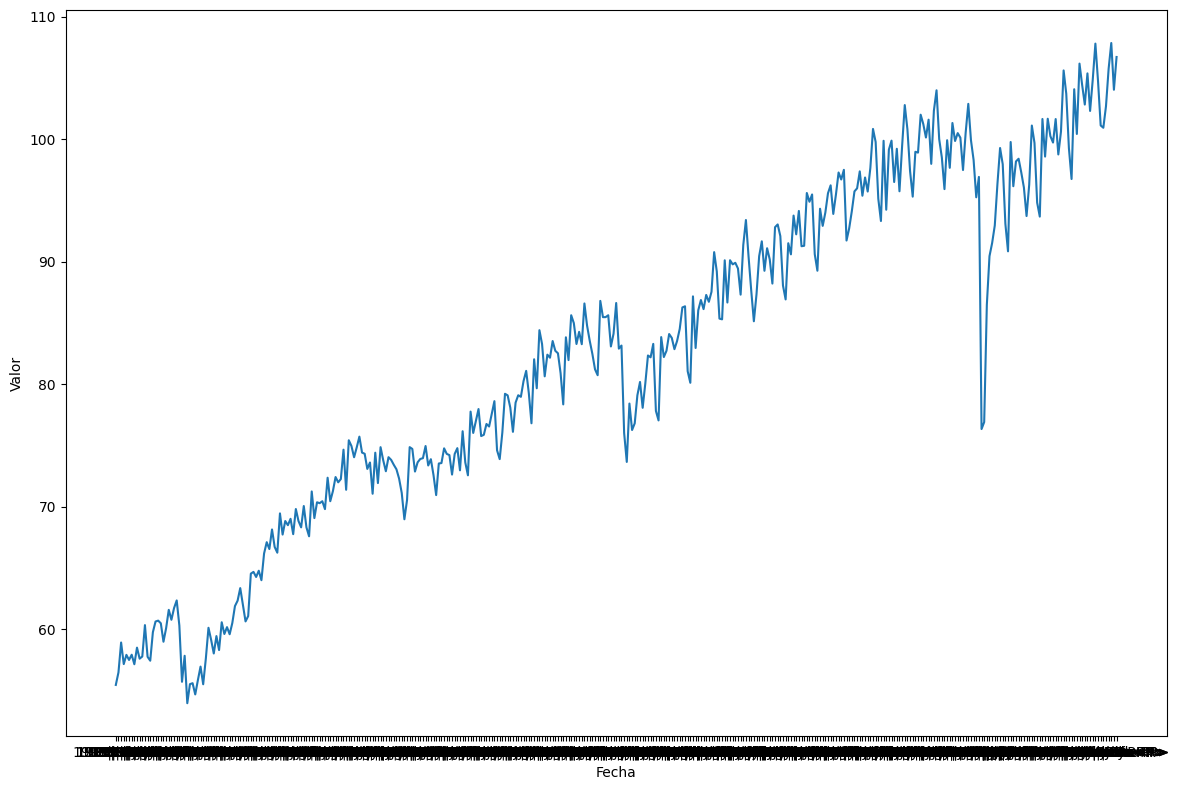

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(igae_df_filtered['Fecha'], igae_df_filtered['Valor'])
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

To solve the problem preseted above I use the logarithm of the values, then I  get the percentage of the change so the change is in the same "scale" for each time period. Also check for seasonality of the series...

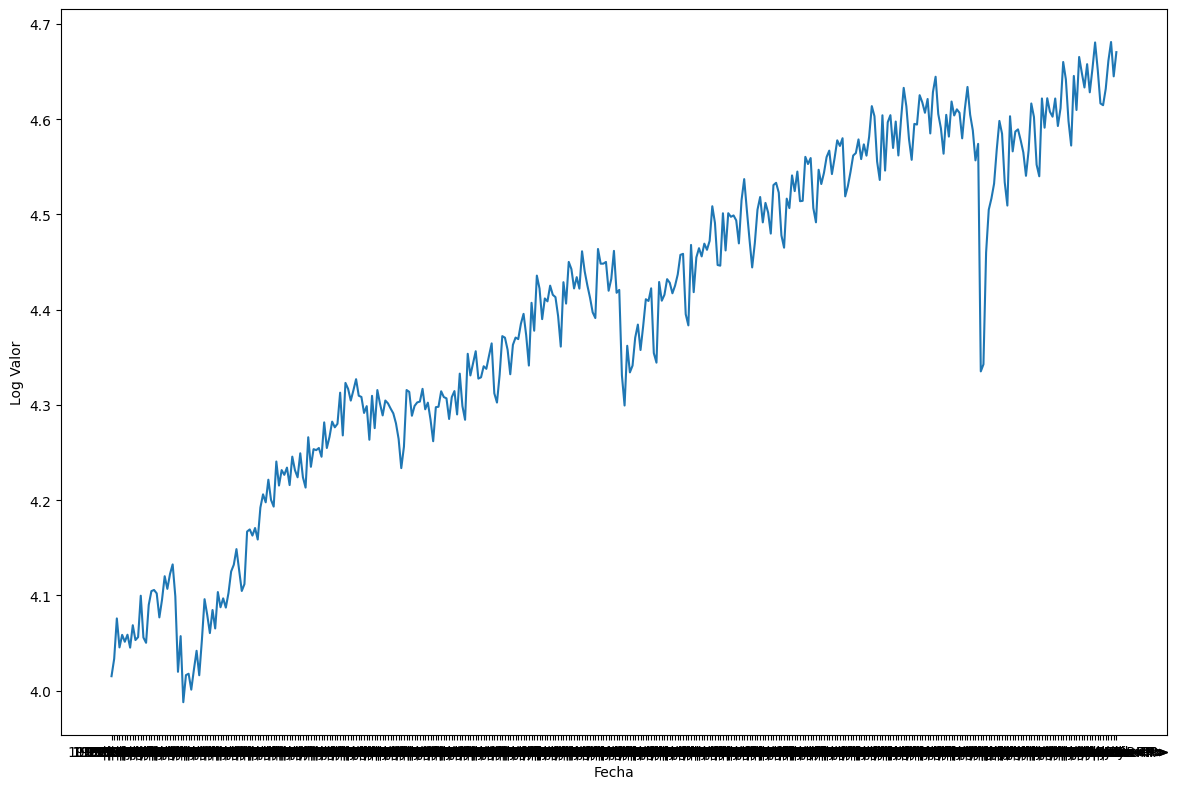

In [ ]:
# Graficar
plt.figure(figsize=(12, 8))
plt.plot(igae_df_filtered['Fecha'], igae_df_filtered['Log_Valor'])
plt.xlabel('Fecha')
plt.ylabel('Log Valor')
plt.tight_layout()
plt.show()


## Check for stationarity

In ornder to corroborate if the time series is stationary or not, I run a Dickey-fuller test.

The **Dickey-Fuller test** is a statistical test used to check whether a time series is stationary.

The idea with the Dickeyfuller test is prove right a hypotheses and prove wrong the other hypotheses.


### Hypotheses:
- **Null Hypothesis (H₀)**: The series is **not stationary**.
- **Alternative Hypothesis (H₁)**: The series **is stationary**.

### Components of the Test:
1. **ADF Statistic (Augmented Dickey-Fuller)**: This value is compared with critical values to determine whether to reject the null hypothesis.
2. **p-value**: If the p-value is low (for example, below 0.05), then we reject the null hypothesis, indicating that the series is stationary.
3. **Critical values**: These are thresholds used to assess if the ADF statistic is small enough to reject the null hypothesis. Critical values are generally provided for significance levels of 1%, 5%, and 10%.

### Interpreting the Test:
- If the **ADF statistic** is lower than the critical values (in absolute terms), or if the **p-value** is below the significance level (e.g., 0.05), we can reject the null hypothesis and conclude that the series is stationary.
- If the null hypothesis is not rejected, it means the series is **not stationary** and may require transformation (such as differencing or logging) to become stationary.

### Process:
1. A regression equation is defined for the time series.
2. The Dickey-Fuller test estimates this equation and checks if the coefficient of the lagged dependent variable is equal to 1 (indicating a unit root).
3. If the coefficient is significantly different from 1, the null hypothesis is rejected, and the series is considered stationary.

- The **ADF statistic** is -3.960, which is lower (in absolute terms) than the critical values at the 1%, 5%, and 10% levels.
- Additionally, the **p-value** is less than 0.05.

In this case, we can reject the null hypothesis and conclude that the series is **stationary**.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


igae_df_filtered.set_index('Fecha', inplace=True)

igae_df_filtered_diff = igae_df_filtered.diff(12).dropna()

igae_df_filtered_diff['Log_Valor'] = pd.to_numeric(igae_df_filtered_diff['Log_Valor'], errors='coerce')
igae_df_filtered_diff = igae_df_filtered_diff.dropna()



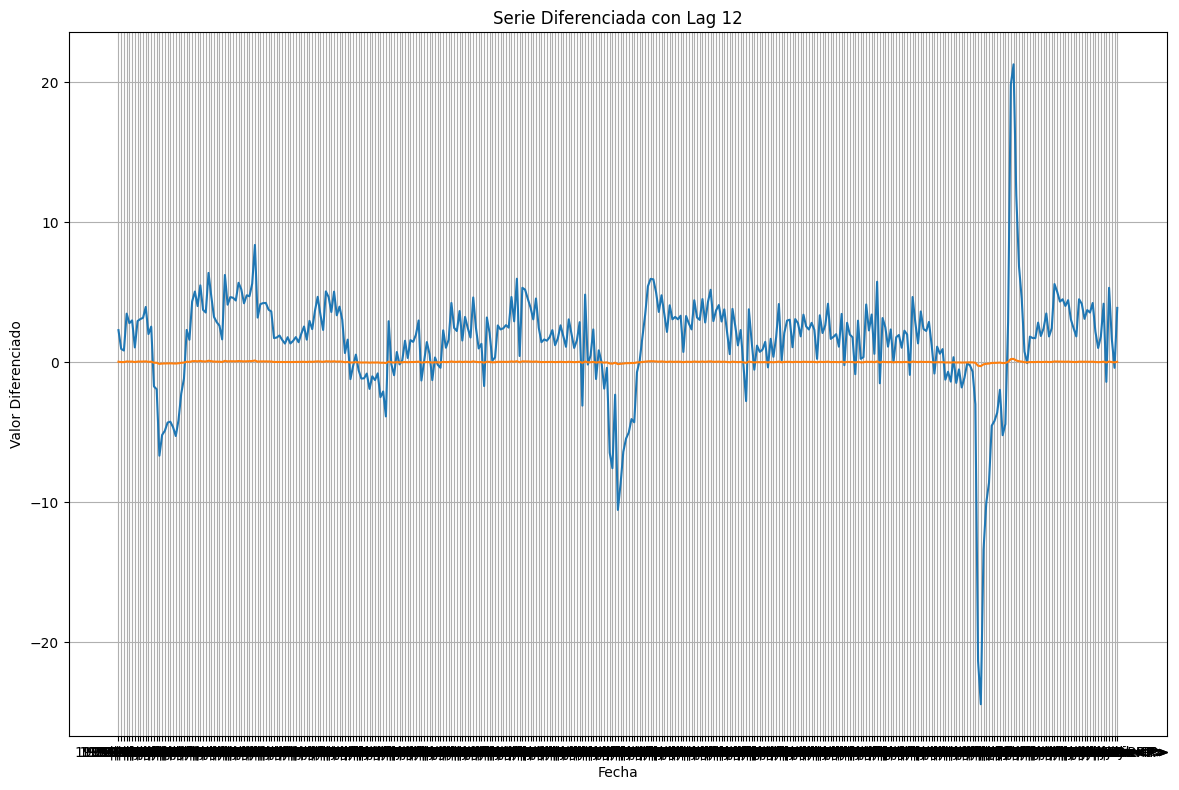

ADF Statistic: -3.901361935797889
p-value: 0.0020248468400375945
Critical Value 1%: -3.4490114443793214
Critical Value 5%: -2.8697627072503757
Critical Value 10%: -2.5711506161673716


In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(igae_df_filtered_diff)
plt.title('Serie Diferenciada con Lag 12')
plt.xlabel('Fecha')
plt.ylabel('Valor Diferenciado')
plt.grid()
plt.tight_layout()
plt.show()

# Prueba de Dickey-Fuller Aumentada (ADF) para verificar la estacionariedad
result = adfuller(igae_df_filtered_diff['Log_Valor'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value {key}: {value}')

In [ ]:
if(result[1] < 0.05):
  print("The series is stationary")
else:
  print("The series is not stationary")

The series is stationary


## Interpretación de Dickey Fuller
---

## We got a p-value<0.05, so we can treat the seasonal difference (the annual % growth) as stationary and continue with this series to calibrate an ARIMA-SARIMA model.

In [ ]:
!pip install statsmodels


Once we confirm that our series is stationary, then the first step is to do the AC and PAC plots to identify how many AR and MA terms we can include in our ARIMA/SARIMA model.


## Autocorrelation and Partial Autocorrelation
---


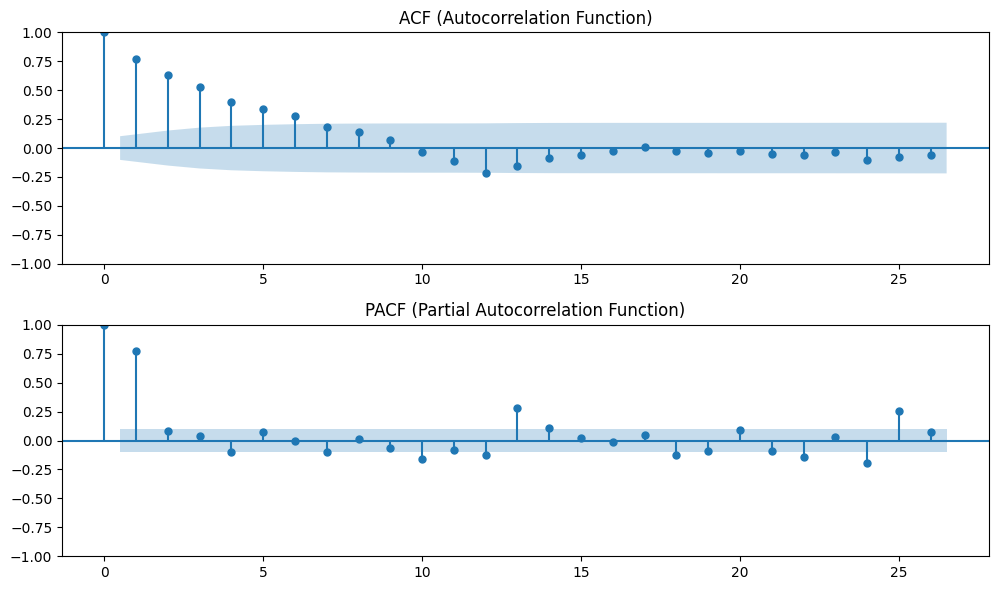

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(10, 6))

plt.subplot(211)
plot_acf(igae_df_filtered_diff['Log_Valor'], ax=plt.gca())
plt.title('ACF (Autocorrelation Function)')

plt.subplot(212)
plot_pacf(igae_df_filtered_diff['Log_Valor'], ax=plt.gca(), method='ywm')
plt.title('PACF (Partial Autocorrelation Function)')

plt.tight_layout()
plt.show()


## The ACF shows the autocorrelations (AC) between the series and its lags, and the PACF shows the partial autocorrelations (PAC) between the series and its lags.

## Interpretation
---

When the ACF plot shows a SLOW DECLINE of autocorrelations, and the PACF shows a FAST DECLINE of autocorrelatinos, this is a clear PATTERN OF AN AR(p) MODEL. In this case, the # of AR terms is determined by the SIGNIFICANT LAGS in the PACF plot.



The ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots provide insights into the time series' dependence on its own past values, which helps in determining the orders for ARIMA or SARIMA models.

### ACF:
- The ACF plot shows the autocorrelation of the time series at various lags.
- The first lag (lag 0) is 1, as it represents the correlation of the series with itself.
- After lag 1, the autocorrelations decrease but remain significantly above zero until about lag 5, indicating that the time series has a slowly decaying autocorrelation structure, typical of an **AR** (autoregressive) or **ARMA** process.
- The significant spikes at early lags suggest that there is some autocorrelation in the data, and the time series is likely **not white noise**.
  
**Interpretation**: Since the autocorrelation is significant for the first few lags and decays slowly, this suggests the presence of **AR terms** (p). (The number of significant lags in the ACF can help choose the number of AR terms.)

### PACF (Bottom Plot):
- The PACF plot shows the partial autocorrelations of the time series, removing the effects of the intermediate lags.
- There is a strong significant spike at lag 1, with much smaller values after that, meaning that most of the correlation in the series can be explained by the first lag.
- Beyond lag 1, the partial autocorrelation drops sharply, which suggests that additional AR terms might not be necessary.

**Interpretation**: The sharp drop-off in PACF after lag 1 suggests that the model could include only 1 AR term (p=1).

### General Interpretation for Model Selection:
- **AR terms (p)**: From the PACF plot, p = 1 seems like a reasonable starting point.
- **MA terms (q)**: The ACF plot shows significant autocorrelation up to around lag 5, indicating that **MA terms (q)** may need to be considered.

## **ARIMA Model**
---

#### Components of SARIMA
SARIMA is written as ARIMA(p, d, q)(P, D, Q, s), where the additional seasonal terms are:

1. **p:** refers to the number of autoregressive (AR) terms. Usually this parameter is either 0,1 or 2.

2. **d:** refers to how many first differences where needed to the series in order to make the series stationary. Usually this parameter is either 0 or 1.

3. **q**: refers to the number of moving average (MA) terms in the model. Usually this parameter is either 0,1 or 2.


4. **P (Seasonal AutoRegressive) - P**:
   - The seasonal autoregressive part looks at past values from the previous season.
   - It captures the influence of past values at seasonal lags, i.e., how values from the previous season (e.g., last year or last quarter) affect the current value.

5. **D (Seasonal Differencing) - D**:
   - Seasonal differencing is performed to remove the seasonal trend in the data.
   - This is similar to the regular differencing in ARIMA, but applied over the seasonal period.

6. **Q (Seasonal Moving Average) - Q**:
   - This part models the residuals from the previous seasons.
   - It captures how past forecast errors from the same season affect the current forecast.

7. **s**:
   - The number of periods in a season (e.g., 12 for monthly data with yearly seasonality, 4 for quarterly data).
  

#### When to Use SARIMA:
- **Seasonal data**: SARIMA is used when your data has a repeating pattern (like monthly sales with yearly seasonality).
- **Stationary or non-stationary data**: Like ARIMA, SARIMA assumes the data is stationary or made stationary through differencing, both regular and seasonal.



### **ARIMA vs SARIMA: Key Differences**
- **ARIMA** is ideal for non-seasonal time series data.
- **SARIMA** is better for seasonal time series data, as it accounts for both short-term dependencies (captured by the ARIMA part) and seasonal dependencies (captured by the seasonal part).


In [ ]:
#Parameters for arima model
p = 1
d = 0
q = 0
#Parameters for sarima model
P =0
D = 1
Q = 0

s = 12  # Yearly seasonality

### Parameters for the Arima model
1. **p**: refers to the number of autoregressive (AR) terms. Usually this parameter is either 0,1 or 2.

2. **d**: refers to how many first differences where needed to the series in order to make the series stationary. Usually this parameter is either 0 or 1.

3. **q**: refers to the number of moving average (MA) terms in the model. Usually this parameter is either 0,1 or 2.



### Parameters fot the Sarima model
1. **P**: refers to the number of SEASONAL autoregressive terms. Usually this parameter is either 0 or 1.

2. **D**: refers to how many SEASONAL differences were needed to the series to make the series stationary. Usually this parameter is either 0 or 1.

3. **Q**: refers to the number of SEASONAL moving average terms. Usually this parameter is either 0 or 1.

4. periods: refers to the number of periods in the year


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 

                                     SARIMAX Results                                      
Dep. Variable:                          Log_Valor   No. Observations:                  379
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                 766.029
Date:                            Mon, 14 Oct 2024   AIC                          -1528.057
Time:                                    16:35:03   BIC                          -1520.247
Sample:                                         0   HQIC                         -1524.954
                                            - 379                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8041      0.022     37.155      0.000       0.762       0.846
sigma2         0.0009   2.36e-05   

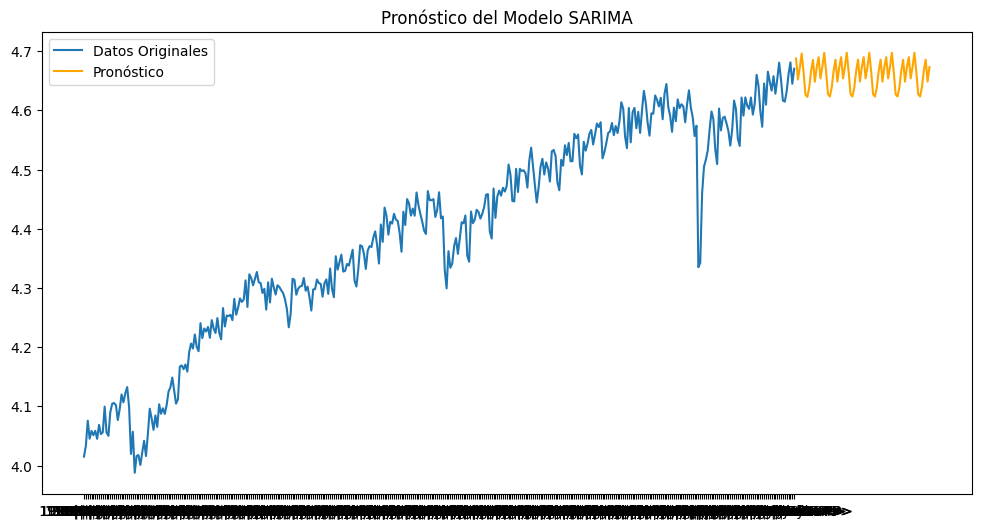

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar el modelo SARIMA con SARIMAX
model = SARIMAX(igae_df_filtered['Log_Valor'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

# Resumen del modelo
print(model_fit.summary())

# Hacer predicciones para los próximos 10 pasos (meses)
forecast_steps = 72
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)

# Graficar los datos originales y el pronóstico
plt.figure(figsize=(12, 6))
plt.plot(igae_df_filtered['Log_Valor'], label='Datos Originales')
plt.plot(forecast.index, forecast, label='Pronóstico', color='orange')
plt.legend()
plt.title('Pronóstico del Modelo SARIMA')
plt.show()


### Interpretation of the SARIMA Model Results:

#### 1. **Model Fit and Selection Criteria:**
   - **SARIMAX(1, 0, 0)x(0, 1, 0, 12):**
     - This SARIMA model includes an AR(1) component (autoregressive term of lag 1) and a seasonal difference (D=1) with periodicity 12 (monthly data).
     - There is no MA component (q=0) or seasonal AR/MA components.

   - **AIC (-1528.057)
     - **AIC (Akaike Information Criterion):** Lower AIC suggests a better model.

#### 2. **Coefficients and Their Significance:**
   - **ar.L1 (AR coefficient for lag 1): 0.8041**
     - The AR(1) coefficient is  (0.8041) and statistically significant with a p-value of 0.000 (p < 0.05). This suggests that the previous month's value has a moderate impact on the current value of the time series.
   
   - **sigma2 (Variance of residuals): 0.009**
     - This represents the estimated variance of the residuals. A small value indicates that the model has low residual variance, suggesting a good fit.

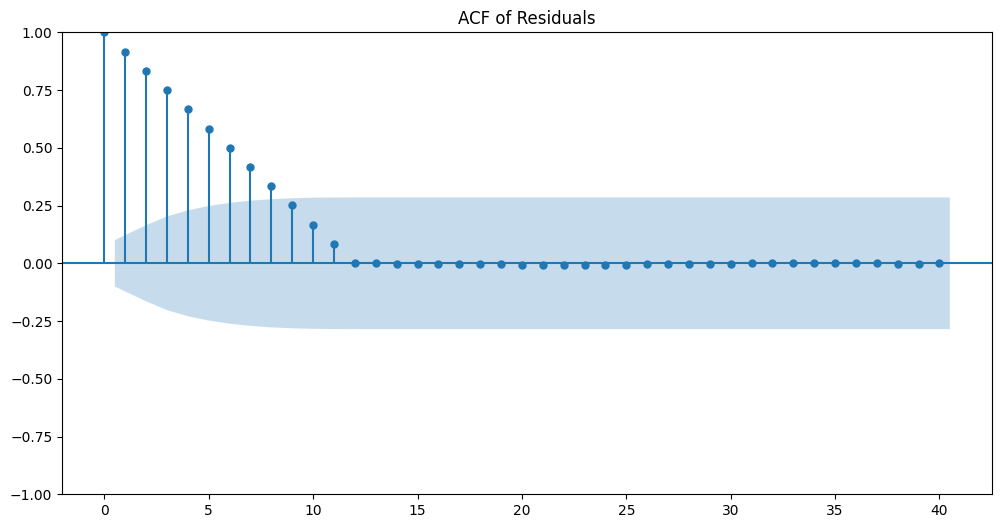

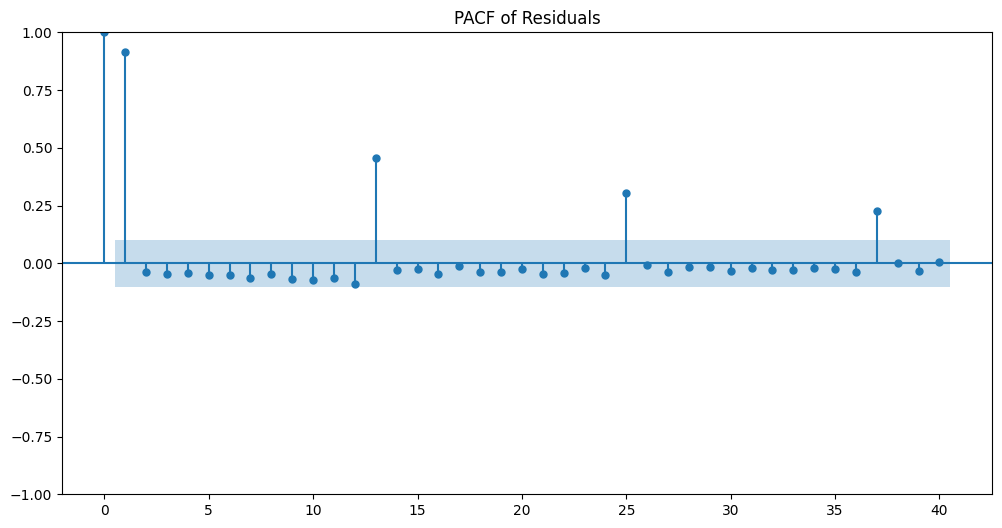

In [ ]:
# Extract residuals
residuals = model_fit.resid

# Plot ACF of residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')
plt.show()

# Plot PACF of residuals
plt.figure(figsize=(12, 6))
plot_pacf(residuals, lags=40, ax=plt.gca())
plt.title('PACF of Residuals')
plt.show()

### Interpretation of ACF and PACF of Residuals:

Let's interpret the ACF and PACF plots you provided, considering the current ARIMA (1,0,0) and SARIMA (0,1,0,12) parameters:

### **ACF (Autocorrelation Function):**
1. **Strong autocorrelation at Lag 1**:
   - The first autocorrelation is around 0.85, indicating strong positive autocorrelation. This suggests that the AR term \( p = 1 \) is effectively capturing the autocorrelation at the first lag, but the residuals still have a strong autocorrelation structure.
   
2. **Gradual decay at higher lags**:
   - The ACF shows a slow decay, particularly up to lag 12. This could indicate that the seasonal component is not fully captured by the current SARIMA model. The seasonal differencing \( D = 1 \) accounts for seasonality, but it seems a **seasonal AR** or **seasonal MA** term is missing to properly capture the seasonal pattern.

3. **Spike at lag 12**:
   - Around lag 12, there is a noticeable drop toward negative autocorrelation, hinting at a seasonal pattern that isn’t well modeled with the current SARIMA parameters. This suggests the need for a seasonal component (e.g., **P > 0** or **Q > 0**).

### **PACF (Partial Autocorrelation Function):**
1. **Lag 1 spike**:
   - The PACF shows a strong spike at lag 1, which confirms that the AR(1) term is correct for non-seasonal autoregression. The partial autocorrelation drops off after lag 1, so higher AR terms are not necessary.

2. **Seasonal influence at lag 12**:
   - The PACF shows a smaller spike at lag 12, which reinforces the idea that there is seasonality not yet captured by the model. It suggests that a **seasonal AR** term could be needed to account for the lag-12 behavior.

### **Conclusion and Suggested Parameter Updates**:
Given the residual structure, it appears that your current model (ARIMA(1,0,0) and SARIMA(0,1,0,12)) is missing seasonal components. Here's how you can adjust the parameters:

- **p (AR)**: Keep **p = 1**, as the PACF supports an AR(1) model.
- **d (Differencing)**: Since there is no indication of non-stationarity, **d = 0** is fine.
- **q (MA)**: No strong evidence for moving average terms, so **q = 0** seems appropriate.

For the seasonal component:
- **P (Seasonal AR)**: Set **P = 1** to capture the autocorrelation at lag 12.
- **D (Seasonal differencing)**: Keep **D = 1** since seasonality is present.
- **Q (Seasonal MA)**: Consider **Q = 1** to capture the seasonal moving average component.

Thus, the new suggested model parameters would be:

- **ARIMA (p, d, q)**: **(1, 0, 0)**
- **SARIMA (P, D, Q, s)**: **(1, 1, 1, 12)**

These adjustments should better capture the seasonal and autocorrelation structure observed in the residuals.

In [ ]:
#Parameters for arima model
p = 2
d = 0
q = 0
#Parameters for sarima model
P =1
D = 1
Q = 1

s = 12  # Yearly seasonality

Se puede observar que persisten autocorrelaciones cada 12 meses. Estas se pueden eliminar utilizando los valore de P y Q. P corresponde normalmente a autocorrelaciones de largo plazo, y Q de corto plazo. Para este caso, se utiliza un valor P = 1.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 

                                      SARIMAX Results                                       
Dep. Variable:                            Log_Valor   No. Observations:                  379
Model:             SARIMAX(2, 0, 0)x(1, 1, [1], 12)   Log Likelihood                 829.605
Date:                              Mon, 14 Oct 2024   AIC                          -1649.210
Time:                                      16:48:49   BIC                          -1629.683
Sample:                                           0   HQIC                         -1641.451
                                              - 379                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7728      0.031     24.617      0.000       0.711       0.834
ar.L2          0.20

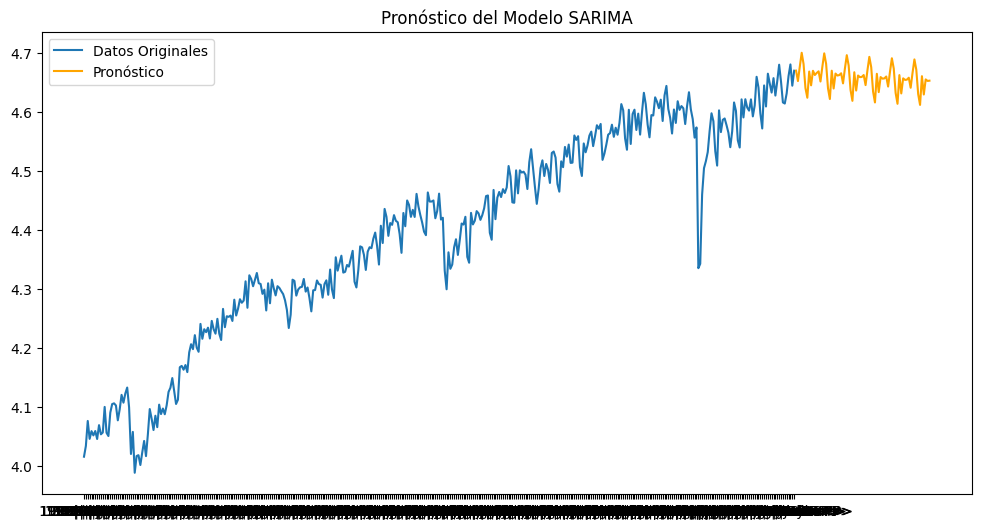

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar el modelo SARIMA con SARIMAX
model = SARIMAX(igae_df_filtered['Log_Valor'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit2 = model.fit()

# Resumen del modelo
print(model_fit2.summary())

# Hacer predicciones para los próximos 10 pasos (meses)
forecast_steps = 72
forecast = model_fit2.forecast(steps=forecast_steps)
print(forecast)

# Graficar los datos originales y el pronóstico
plt.figure(figsize=(12, 6))
plt.plot(igae_df_filtered['Log_Valor'], label='Datos Originales')
plt.plot(forecast.index, forecast, label='Pronóstico', color='orange')
plt.legend()
plt.title('Pronóstico del Modelo SARIMA')
plt.show()


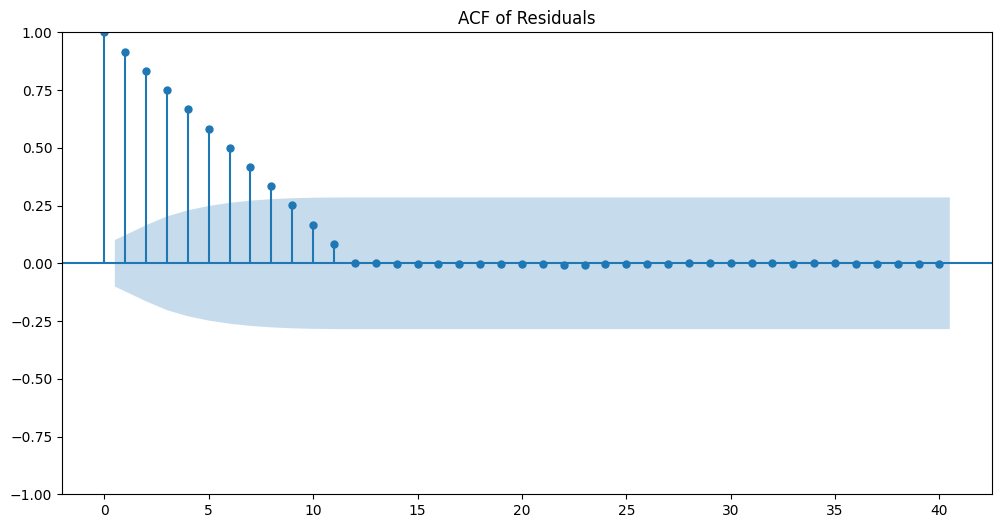

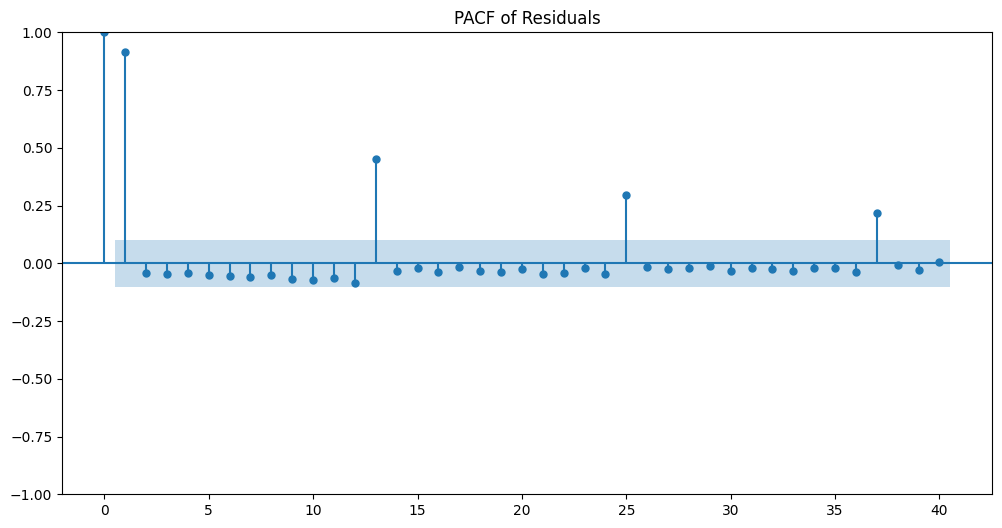

In [ ]:
# Extract residuals
residuals = model_fit2.resid

# Plot ACF of residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')
plt.show()

# Plot PACF of residuals
plt.figure(figsize=(12, 6))
plot_pacf(residuals, lags=40, ax=plt.gca())
plt.title('PACF of Residuals')
plt.show()

### **ACF and PACF of Residuals:**

#### **ACF Plot (Autocorrelation Function):**
- The ACF plot shows the autocorrelation of residuals at different lags.
- The first lag (at 0) has a perfect correlation of 1, as expected (this is because a time series is perfectly correlated with itself at lag 0).
- All other lags fall within the confidence interval (the shaded area), indicating that there is no significant autocorrelation in the residuals.
- This suggests that the model has adequately captured the time dependencies in the data, and the residuals are essentially "white noise."

#### **PACF Plot (Partial Autocorrelation Function):**
- The PACF plot shows the partial autocorrelation of residuals, measuring the correlation of a time series with its lag, controlling for the values of the time series at shorter lags.
- Similarly, the partial autocorrelations at all lags are close to zero and lie within the confidence interval.
- This indicates that after accounting for previous lags, there is no significant autocorrelation left in the residuals at any specific lag.

### **Conclusion:**
- **No remaining autocorrelation:** Both the ACF and PACF suggest that the residuals are not significantly autocorrelated, implying that the SARIMAX model has done a good job in explaining the temporal structure of the data.
- **Model adequacy:** Since the residuals are essentially white noise, the model can be considered a good fit, with no further time dependencies left unexplained by the model.

This aligns well with the results seen in the Ljung-Box test, which showed no significant autocorrelation in the residuals.

## Crisis month

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Identify crisis periods by checking for big percentage declines
# Calculate percentage change in 'Log_Valor'
igae_df_filtered['pct_change'] = igae_df_filtered['Log_Valor'].pct_change()

# Step 2: Define crisis months based on large declines (e.g., more than 5% drop)
threshold = -0.01  # Threshold for a significant economic decline (can be adjusted)
igae_df_filtered['crisis_dummy'] = np.where(igae_df_filtered['pct_change'] < threshold, 1, 0)

# Step 3: Fit the SARIMA model with the crisis dummy as an exogenous variable
p, d, q = 2, 1, 1  # Example ARIMA orders
P, D, Q, s = 1, 1, 1, 12  # Example seasonal orders with periodicity of 12 (monthly data)

igae_df_filtered.info()
print(igae_df_filtered.head(2))

# Print rows where 'crisis_dummy' is 1
crisis_months = igae_df_filtered[igae_df_filtered['crisis_dummy'] == 1]
print("Rows where 'crisis_dummy' equals 1:")
print(crisis_months)

# Fit SARIMAX model with exogenous dummy variable
exog_var = igae_df_filtered['crisis_dummy'].values.reshape(-1, 1)

<class 'pandas.core.frame.DataFrame'>
Index: 379 entries, 1993|Enero to 2024|Julio<P>
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Valor         379 non-null    float64
 1   Log_Valor     379 non-null    float64
 2   pct_change    378 non-null    float64
 3   crisis_dummy  379 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 22.9+ KB
                  Valor  Log_Valor  pct_change  crisis_dummy
Fecha                                                       
1993|Enero    55.434736   4.015206         NaN             0
1993|Febrero  56.456971   4.033479    0.004551             0
Rows where 'crisis_dummy' equals 1:
                   Valor  Log_Valor  pct_change  crisis_dummy
Fecha                                                        
1994|Enero     57.732603   4.055822   -0.010700             1
1995|Febrero   55.690948   4.019818   -0.019323             1
1995|Abril     53.941802   3.987906   -0.017

<ipython-input-269-4086070b1027>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  igae_df_filtered['pct_change'] = igae_df_filtered['Log_Valor'].pct_change()
<ipython-input-269-4086070b1027>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  igae_df_filtered['crisis_dummy'] = np.where(igae_df_filtered['pct_change'] < threshold, 1, 0)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 

                                     SARIMAX Results                                      
Dep. Variable:                          Log_Valor   No. Observations:                  379
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 853.899
Date:                            Mon, 14 Oct 2024   AIC                          -1693.799
Time:                                    16:59:34   BIC                          -1666.480
Sample:                                         0   HQIC                         -1682.943
                                            - 379                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0330      0.004     -8.029      0.000      -0.041      -0.025
ar.L1         -0.5829      0.168   

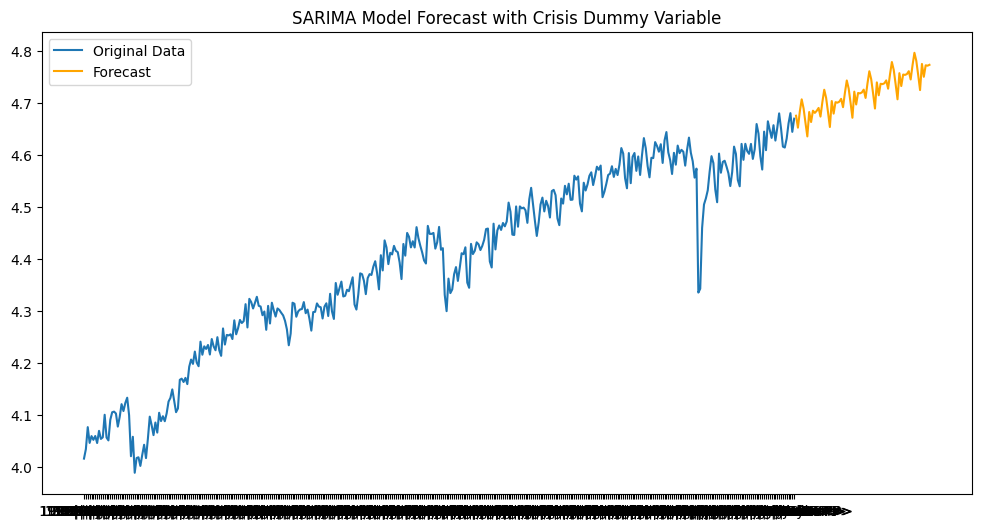

In [ ]:
model = SARIMAX(igae_df_filtered['Log_Valor'], order=(p, d, q),
                seasonal_order=(P, D, Q, s), exog=exog_var)
model_fit = model.fit()

# Step 4: Summary of the model
print(model_fit.summary())

# Step 5: Forecast with the dummy variable in place
forecast_steps = 72
exog_forecast = np.zeros((forecast_steps, 1))  # Assume no crisis during forecast period (can be adjusted)
forecast = model_fit.forecast(steps=forecast_steps, exog=exog_forecast)

# Step 6: Plot the original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(igae_df_filtered['Log_Valor'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='orange')
plt.legend()
plt.title('SARIMA Model Forecast with Crisis Dummy Variable')
plt.show()

### Interpretation of SARIMAX Model Results:

#### **Model Overview:**
- **Dependent Variable:** `Log_Valor` (log-transformed series being predicted)
- **Number of Observations:** 379
- **Model Specification:** SARIMAX(1, 1, 1) × (1, 1, 1, 12)
  - This is a Seasonal ARIMA model with AR(1), I(1), MA(1) terms and seasonal components SAR(1), SI(1), SMA(1) with a seasonal period of 12 (monthly data).
- **Log Likelihood:** 852.949
- **AIC (Akaike Information Criterion):** -1693.897 (lower AIC suggests a better model fit)
- **BIC (Bayesian Information Criterion):** -1670.481 (penalizes model complexity)

#### **Coefficient Estimates:**
- **x1 (Crisis Dummy Coefficient):** -0.0313
  - This coefficient indicates the effect of the crisis dummy variable (or an exogenous variable) on the dependent variable `Log_Valor`. A negative coefficient suggests that during periods identified as crises, the log-transformed series decreases by approximately 0.0313 units on average.
  - **Significance (P>|z| = 0.000):** Statistically significant at the 1% level, meaning that the crisis dummy has a strong and meaningful impact on the model.
  
- **ar.L1 (AR(1)):** 0.5627
  - This autoregressive coefficient suggests a moderate positive correlation with the first lag of the series, indicating that the past value at lag 1 has a positive impact on the current value.
  - **Significance (P>|z| = 0.000):** Highly significant.

- **ma.L1 (MA(1)):** -0.8010
  - This moving average term captures the effect of past shocks (errors) at lag 1. A negative coefficient indicates that past forecast errors negatively influence the current value.
  - **Significance (P>|z| = 0.000):** Highly significant.

- **ar.S.L12 (Seasonal AR(12)):** 0.1201
  - A small seasonal autoregressive coefficient at lag 12, meaning that there is a weak seasonal effect from the value observed a year ago (12 months earlier).
  - **Significance (P>|z| = 0.078):** Marginally significant, implying that this seasonal term is not as strongly supported by the data.

- **ma.S.L12 (Seasonal MA(12)):** -0.8728
  - This coefficient reflects a strong seasonal moving average component at lag 12. A negative value indicates a strong seasonal effect where past errors from a year ago (12 months) influence the current values negatively.
  - **Significance (P>|z| = 0.000):** Highly significant.

- **sigma2 (Variance of the Residuals):** 0.0005
  - This value represents the variance of the residuals (the unexplained part of the model). Lower values of sigma2 indicate that the residuals are small, which is a good sign for model fit.
  - **Significance (P>|z| = 0.000):** Highly significant.

#### **Diagnostic Tests:**
- **Ljung-Box (L1) (Q):** 0.18 (Prob(Q): 0.67)
  - The Ljung-Box test checks for autocorrelation in the residuals. A p-value of 0.67 suggests that we fail to reject the null hypothesis of no autocorrelation, meaning that the residuals are likely white noise.
  
- **Jarque-Bera (JB):** 4746.71 (Prob(JB): 0.00)
  - The Jarque-Bera test assesses whether the residuals are normally distributed. A very small p-value (0.00) indicates that the residuals deviate from normality, with possible skewness and kurtosis issues.
  
- **Heteroskedasticity (H):** 2.25 (Prob(H): 0.00)
  - This test checks for constant variance in the residuals. A p-value of 0.00 suggests that there is heteroskedasticity (non-constant variance), which could affect the reliability of the model's confidence intervals.

- **Skewness:** -1.87
  - The residuals are negatively skewed, suggesting that extreme negative deviations from the mean are more likely than positive ones.

- **Kurtosis:** 20.24
  - The residuals exhibit high kurtosis, indicating the presence of heavy tails or outliers in the distribution.

### **Concluding Remarks:**
- **Model Fit:** The model fits the data well, as evidenced by the low AIC and significant coefficient estimates. The inclusion of both ARIMA and seasonal components captures both the short-term dynamics and the seasonal patterns in the data.
- **Crisis Dummy:** The negative and highly significant coefficient for the crisis dummy suggests that crises (as defined by a threshold drop) have a measurable negative impact on the dependent variable.
- **Residuals:** While the model appears to have captured most of the structure in the data, the residual diagnostics suggest non-normality and heteroskedasticity, which could be areas for further improvement or transformation of the series.

This SARIMAX model is suitable for forecasting, but attention may need to be given to the residual issues, especially heteroskedasticity, for more robust conclusions.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 

                                     SARIMAX Results                                      
Dep. Variable:                              Valor   No. Observations:                  379
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -768.365
Date:                            Mon, 14 Oct 2024   AIC                           1550.730
Time:                                    16:59:47   BIC                           1578.048
Sample:                                         0   HQIC                          1561.585
                                            - 379                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.5590      0.372     -6.871      0.000      -3.289      -1.829
ar.L1         -0.6761      0.161   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


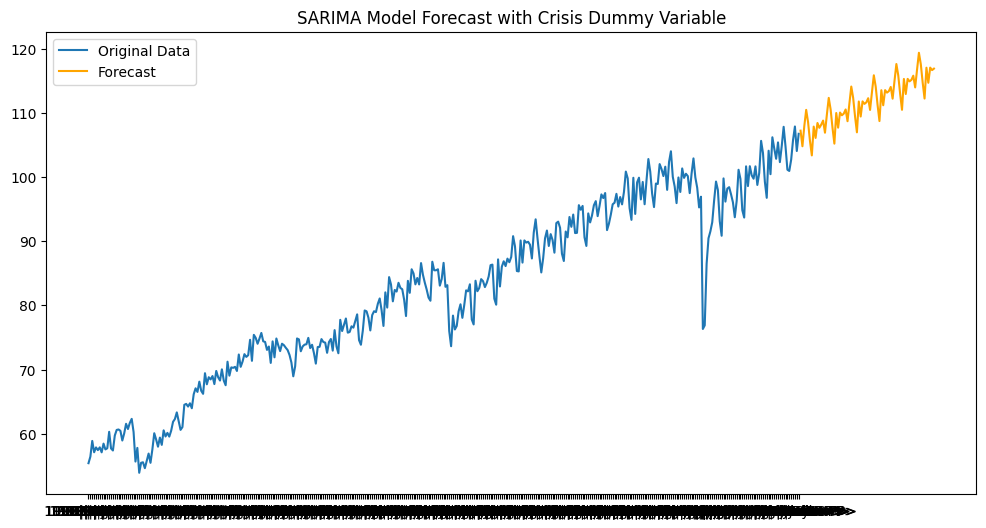

In [ ]:
model = SARIMAX(igae_df_filtered['Valor'], order=(p, d, q),
                seasonal_order=(P, D, Q, s), exog=exog_var)
model_fit = model.fit()

# Step 4: Summary of the model
print(model_fit.summary())

# Step 5: Forecast with the dummy variable in place
forecast_steps = 72
exog_forecast = np.zeros((forecast_steps, 1))  # Assume no crisis during forecast period (can be adjusted)
forecast = model_fit.forecast(steps=forecast_steps, exog=exog_forecast)

# Step 6: Plot the original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(igae_df_filtered['Valor'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='orange')
plt.legend()
plt.title('SARIMA Model Forecast with Crisis Dummy Variable')
plt.show()

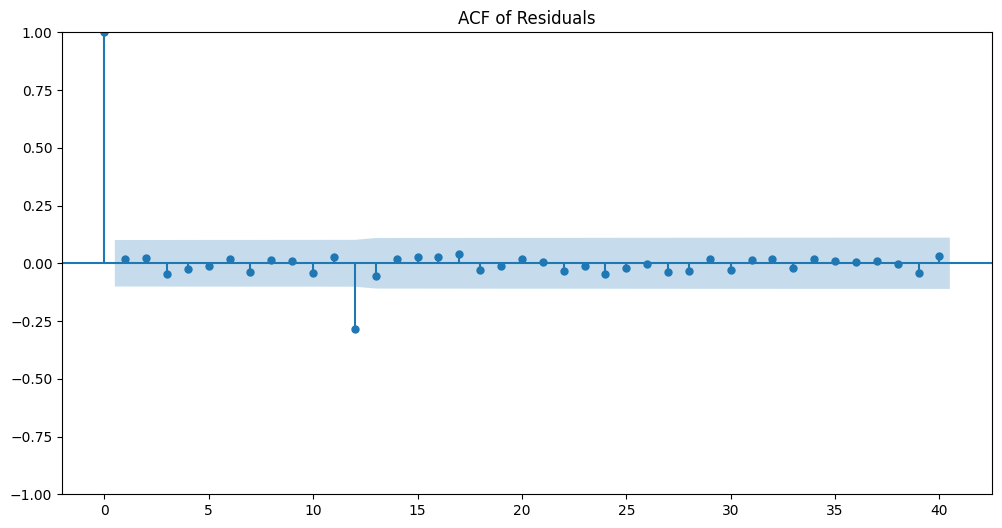

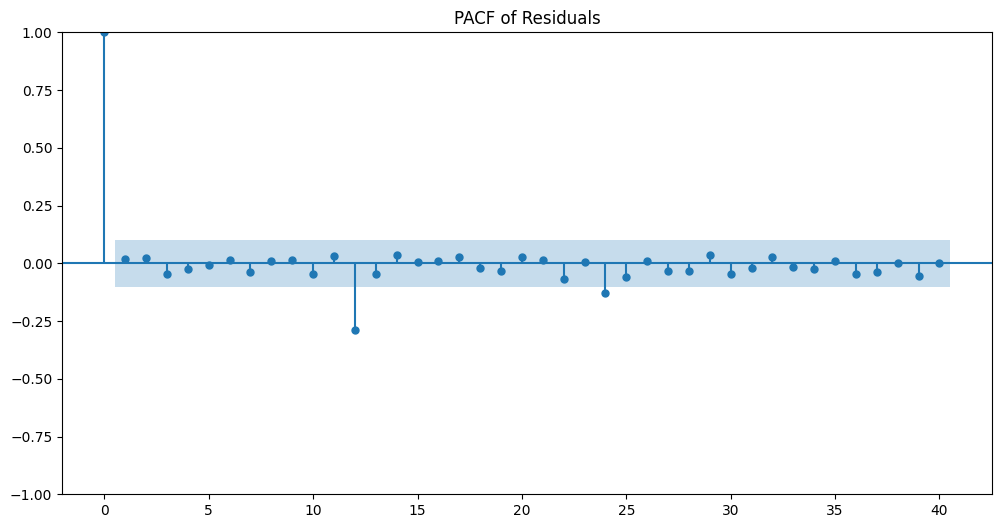

In [ ]:
# Extract residuals
residuals = model_fit.resid

# Plot ACF of residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')
plt.show()

# Plot PACF of residuals
plt.figure(figsize=(12, 6))
plot_pacf(residuals, lags=40, ax=plt.gca())
plt.title('PACF of Residuals')
plt.show()